<a href="https://colab.research.google.com/github/zoraizmohammad/dukeClasses/blob/main/sta240/finalProject/STA240FinalSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***STA240 Final Project***
Completed by: Mohammad Zoraiz & Sylvester Johannes Arizie


# ***General Tasks***
This project is intended as a simulation case study that applies the concepts you learned in class as well as the computational tools you learned in lab. Much of your work will be in coding up a simulation framework that realistically simulates the arrival, service and waiting
times of customers in your business. You might wish to try the following steps to set up the simulator for the base scenario 1 (see below):
1. Code a subprocedure that simulates the arrival times of customers throughout the day.
2. Code a subprocedure that, given output from (a), simulates the serving times of these
customers before they leave.
3. Given output from (a) and (b), code a subprocedure that tells you at a given time point, how many customers are waiting in line, how many customers are being served, and whether the restaurant is experiencing down-time.
4. You can build upon these subprocedures to construct more elaborate and realistic simulation workflows for your restaurant, e.g., Scenario 2 and other scenarios you wish to explore.

Students in prior classes have found it useful to drop by office hours to seek help on coding, so you are more than welcome to do that – we’re here to help!

Project Preview: https://drive.google.com/file/d/1IqlXxooZe8gVvy2u_euSSERWRLfRDYrz/view?usp=sharing

# **Scenario  1**
Consider the simple setting with one dining table and one chef, with operating
hours 10am - 10pm. Suppose customers arrive according to a Poisson process with a rate of λ<sub>A</sub> = 5 per hour. Once a customer arrives, their total service time (ordering, cooking and eating) can be modeled by an exponential distribution with rate λ<sub>S</sub> = 6.

*Note:* It is reasonable to assume waiting and service times for each customer are independently distributed. If a customer arrives and the dining table is occupied, then they would wait in line until the table is vacant.



**1. Arrival TIme Subprocedure**

In [ ]:
generate_arrival_times <- function(lambda, start_hour, end_hour) {
  total_time <- (end_hour - start_hour) * 60 # Convert hours to minutes
  arrivals <- cumsum(rexp(ceiling(lambda * total_time / 60), rate = lambda / 60))
  arrivals <- arrivals[arrivals <= total_time] # Only include arrivals within operating hours

  # Convert minutes to time in AM/PM format
  arrival_times <- format(as.POSIXct((start_hour * 60 + arrivals) * 60, origin = "1970-01-01", tz = "UTC"), "%I:%M %p")
  return(arrival_times)
}

# Example
lambda_A <- 5
start_hour <- 10
end_hour <- 22
arrival_times <- generate_arrival_times(lambda_A, start_hour, end_hour)
print(arrival_times)


 [1] "10:08 AM" "10:12 AM" "10:16 AM" "10:29 AM" "10:30 AM" "10:32 AM"
 [7] "10:50 AM" "10:51 AM" "11:14 AM" "11:16 AM" "11:27 AM" "11:27 AM"
[13] "11:55 AM" "11:56 AM" "12:04 PM" "12:11 PM" "12:15 PM" "12:17 PM"
[19] "12:53 PM" "12:57 PM" "01:04 PM" "01:59 PM" "02:25 PM" "02:59 PM"
[25] "02:59 PM" "03:01 PM" "03:05 PM" "03:13 PM" "03:18 PM" "03:21 PM"
[31] "03:50 PM" "04:13 PM" "04:29 PM" "04:41 PM" "04:46 PM" "04:48 PM"
[37] "05:10 PM" "05:37 PM" "05:45 PM" "06:22 PM" "06:25 PM" "06:26 PM"
[43] "06:39 PM" "06:56 PM" "07:11 PM" "07:11 PM" "07:21 PM" "07:24 PM"
[49] "07:37 PM" "07:46 PM" "07:54 PM" "08:01 PM" "08:30 PM" "08:34 PM"
[55] "08:35 PM" "08:46 PM" "08:49 PM" "08:49 PM" "09:02 PM" "09:19 PM"


**2. Serving time simulation of these customers before they leave.**

In [ ]:
generate_service_times <- function(lambda, num_customers, arrival_times, start_hour) {
  # Generate service times in minutes
  service_times <- rexp(num_customers, rate = lambda) * 60 # Convert hours to minutes

  # Calculate start and end times
  start_times <- sapply(arrival_times, function(at) {
    as.numeric(difftime(as.POSIXct(at, format = "%I:%M %p", tz = "UTC"),
                        as.POSIXct(start_hour * 60 * 60, origin = "1970-01-01", tz = "UTC"),
                        units = "mins"))
  })

  end_times <- start_times + service_times

  # Convert end times to formatted time
  end_times_formatted <- format(as.POSIXct((start_hour * 60 + end_times) * 60, origin = "1970-01-01", tz = "UTC"), "%I:%M %p")

  list(
    service_times = service_times,
    end_times_formatted = end_times_formatted
  )
}

# Example
lambda_S <- 6
num_customers <- length(arrival_times)
service_times_result <- generate_service_times(lambda_S, num_customers, arrival_times, start_hour)

print(service_times_result$service_times)  # Raw service times in minutes
print(service_times_result$end_times_formatted)  # End times in AM/PM format


 [1]  1.3621244  3.8512562 13.2233130  8.4935326  4.1022835  4.1653425
 [7]  2.1840875 11.0065466  2.1552780 42.3344143  9.5588198 11.9671856
[13]  4.6479790  0.2163286  4.9745720  1.9511557  0.5367625 18.7170769
[19]  0.5824635  5.9422020 30.4860139  2.9564548  2.0781150  6.6349642
[25]  0.5259600 18.8361083  9.2939803 12.6895184  7.6690428 12.9740889
[31] 23.1274690 13.4770270 24.2425421  0.9390696  8.8943940  2.7285548
[37] 15.8847584 16.9267120  9.7243641  3.0555664 11.5021458 16.1963066
[43] 12.8900612 34.4821327  0.1570024  1.7098188 10.6648879  1.1351024
[49]  3.0295994 10.5974125  0.6454871 26.7208165  8.3912497  7.4752188
[55]  4.0023888  6.6644773  5.7618798 13.6180788  2.2281654 48.4486582
  10:08 AM   10:12 AM   10:16 AM   10:29 AM   10:30 AM   10:32 AM   10:50 AM 
"10:09 AM" "10:15 AM" "10:29 AM" "10:37 AM" "10:34 AM" "10:36 AM" "10:52 AM" 
  10:51 AM   11:14 AM   11:16 AM   11:27 AM   11:27 AM   11:55 AM   11:56 AM 
"11:02 AM" "11:16 AM" "11:58 AM" "11:36 AM" "11:38 AM" "

**3. At a given time point, how many customers are waiting in line, how many customers are being served, and whether the restaurant is experiencing down-time.**

In [ ]:
simulate_restaurant <- function(arrival_times, service_times, start_hour) {
  n <- length(arrival_times)
  start_times <- numeric(n)
  end_times <- numeric(n)
  waiting_times <- numeric(n)
  table_free_time <- 0 # When the table becomes available
  downtime <- 0 # Accumulate downtime

  for (i in 1:n) {
    # Convert arrival time to minutes since the start of the day
    arrival_in_minutes <- as.numeric(difftime(as.POSIXct(arrival_times[i], format = "%I:%M %p", tz = "UTC"),
                                              as.POSIXct(start_hour * 60 * 60, origin = "1970-01-01", tz = "UTC"),
                                              units = "mins"))

    # Calculate downtime if the table is free before the next customer arrives
    if (arrival_in_minutes > table_free_time) {
      downtime <- downtime + (arrival_in_minutes - table_free_time) # Add idle time
      start_times[i] <- arrival_in_minutes # Start serving immediately
    } else {
      # No downtime, customer waits for the table to be free
      start_times[i] <- table_free_time
    }

    # Calculate waiting time
    waiting_times[i] <- start_times[i] - arrival_in_minutes

    # Calculate end time and update when the table will be free
    end_times[i] <- start_times[i] + service_times[i]
    table_free_time <- end_times[i]
  }

  # Convert start and end times to formatted AM/PM
  start_times_formatted <- format(as.POSIXct((start_hour * 60 + start_times) * 60, origin = "1970-01-01", tz = "UTC"), "%I:%M %p")
  end_times_formatted <- format(as.POSIXct((start_hour * 60 + end_times) * 60, origin = "1970-01-01", tz = "UTC"), "%I:%M %p")

  list(
    arrival_times = arrival_times,
    start_times = start_times_formatted,
    end_times = end_times_formatted,
    waiting_times = waiting_times,
    downtime = downtime # Total downtime in minutes
  )
}

# Example usage
simulation_result <- simulate_restaurant(arrival_times, service_times_result$service_times, start_hour)

# Display the corrected downtime
print(simulation_result)


$arrival_times
 [1] "10:08 AM" "10:12 AM" "10:16 AM" "10:29 AM" "10:30 AM" "10:32 AM"
 [7] "10:50 AM" "10:51 AM" "11:14 AM" "11:16 AM" "11:27 AM" "11:27 AM"
[13] "11:55 AM" "11:56 AM" "12:04 PM" "12:11 PM" "12:15 PM" "12:17 PM"
[19] "12:53 PM" "12:57 PM" "01:04 PM" "01:59 PM" "02:25 PM" "02:59 PM"
[25] "02:59 PM" "03:01 PM" "03:05 PM" "03:13 PM" "03:18 PM" "03:21 PM"
[31] "03:50 PM" "04:13 PM" "04:29 PM" "04:41 PM" "04:46 PM" "04:48 PM"
[37] "05:10 PM" "05:37 PM" "05:45 PM" "06:22 PM" "06:25 PM" "06:26 PM"
[43] "06:39 PM" "06:56 PM" "07:11 PM" "07:11 PM" "07:21 PM" "07:24 PM"
[49] "07:37 PM" "07:46 PM" "07:54 PM" "08:01 PM" "08:30 PM" "08:34 PM"
[55] "08:35 PM" "08:46 PM" "08:49 PM" "08:49 PM" "09:02 PM" "09:19 PM"

$start_times
 [1] "10:08 AM" "10:12 AM" "10:16 AM" "10:29 AM" "10:37 AM" "10:41 AM"
 [7] "10:50 AM" "10:52 AM" "11:14 AM" "11:16 AM" "11:58 AM" "12:08 PM"
[13] "12:20 PM" "12:24 PM" "12:24 PM" "12:29 PM" "12:31 PM" "12:32 PM"
[19] "12:53 PM" "12:57 PM" "01:04 PM" "01:59 PM"

In [ ]:
summarize_simulation <- function(simulation) {
  avg_waiting_time <- mean(simulation$waiting_times)
  total_downtime <- simulation$downtime
  num_customers <- length(simulation$arrival_times)

  cat("Average Waiting Time:", avg_waiting_time, "minutes\n")
  cat("Total Downtime:", total_downtime, "minutes\n")
  cat("Number of Customers Served:", num_customers, "\n")
}

summarize_simulation(simulation_result)

Average Waiting Time: 12.76889 minutes
Total Downtime: 28882210 minutes
Number of Customers Served: 60 


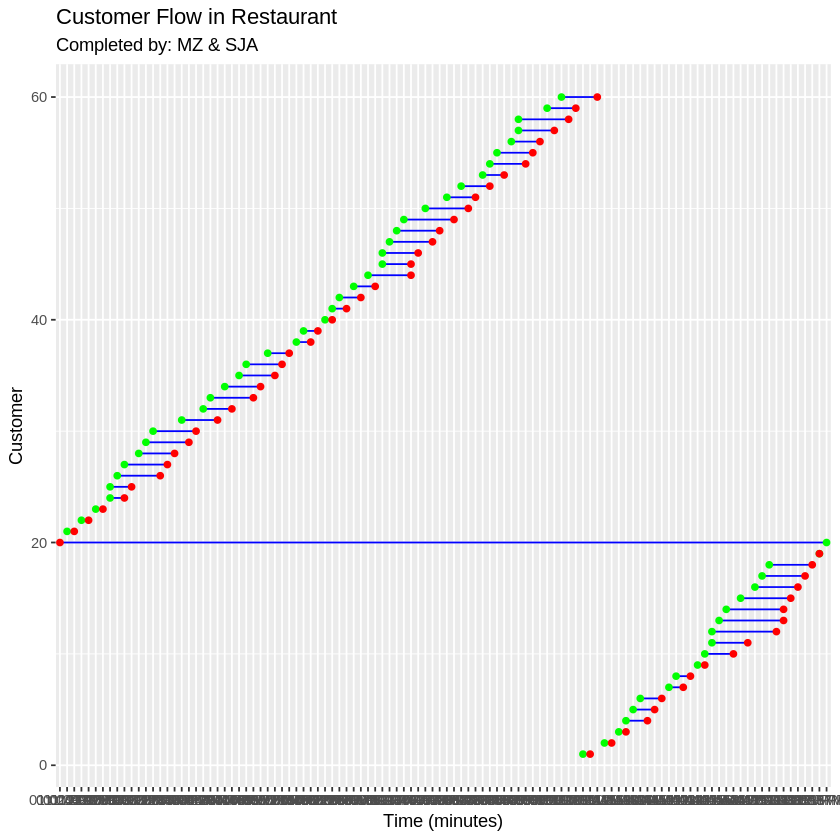

In [ ]:
library(ggplot2)

plot_simulation <- function(simulation) {
  df <- data.frame(
    Customer = 1:length(simulation$arrival_times),
    Arrival = simulation$arrival_times,
    Start = simulation$start_times,
    End = simulation$end_times
  )
  ggplot(df) +
    geom_segment(aes(x = Arrival, xend = End, y = Customer, yend = Customer), color = "blue") +
    geom_point(aes(x = Arrival, y = Customer), color = "green") +
    geom_point(aes(x = End, y = Customer), color = "red") +
    labs(x = "Time (minutes)", y = "Customer", title = "Customer Flow in Restaurant", subtitle = "Completed by: MZ & SJA")
}

plot_simulation(simulation_result)

# **4. Other Possible Scenarios Based Off of Scenario 1**
- ***Sub-scenario 1.2: Two Dining Tables and One Chef***
  - Change: There are now two dining tables, but only one chef. The chef alternates between tables, so only one table can be served at a time.
 - Effect: Customers at one table may have to wait until the chef is free.
- ***Sub-scenario 1.3: VIP Customers with Priority Service***
 - Change: VIP customers (20% of arrivals) get priority over regular customers. VIP customers are always served first, regardless of the queue.
 - Effect: Regular customers might face longer waiting times due to VIPs being prioritized.
- ***Sub-scenario 1.4: Dynamic Service Rates Based on Gamma Distribution
Gamma Distribution***
 - The shape (α) parameter determines how "spread out" the rates are. The scale (β) parameter adjusts the average rate.
 - Gamma distribution models cumulative factors like fatigue, complexity of orders, or efficiency variations during the day.
 - In this example:
    - **Peak Hours** (6-8) Gamma Distribution Parameters (*High Customer Traffic*):
      - *Shape (α=2):* Represents a small number of contributing factors affecting service efficiency (e.g., fatigue and multitasking).
      - *Scale (β=0.2):* Produces a lower mean service rate and more concentrated rates, reflecting that the chef's performance is relatively stable but slower overall during peak hours.
      - *Resulting Service Rates:* Rates are centered around a lower value, with most rates in the range of 0.4 to 1 jobs/hour, meaning the chef handles fewer customers per hour due to higher stress.
    - **Off-Peak Hours** Gamma Distibution Parameters (*Low/Normal Customer Traffic*):
      - *Shape (α=5):*  Represents a larger number of factors contributing to efficiency (e.g., experience, adequate breaks, and fewer distractions).
      - *Scale (β=0.5):*  Produces a higher mean service rate with more variability, reflecting that the chef can handle a broader range of customers efficiently during off-peak times.
      - *Resulting Service Rates:*  Rates are higher and more spread out, typically in the range of 2 to 4 jobs/hour, meaning the chef is more productive and adaptable.



### **Subscenario 1.2: Two Dining Tables with 1 Chef**


Summary Statistics:
Average Waiting Time: 5211.339 minutes
Total Customers Served: 30 
Total Downtime: 11471.05 minutes
   Customer  Arrival    Start      End Waiting_Time
1         1 10:10 AM 10:10 AM 07:50 AM       0.0000
2         2 10:17 AM 10:17 AM 03:21 PM       0.0000
3         3 10:32 AM 03:21 PM 05:56 PM     288.0208
4         4 10:33 AM 05:56 PM 07:54 PM     443.3765
5         5 10:34 AM 07:50 AM 08:08 PM    1276.7824
6         6 10:37 AM 07:54 PM 03:49 AM    1997.0393
7         7 10:41 AM 08:08 PM 02:25 AM    2006.6291
8         8 10:43 AM 02:25 AM 02:58 PM    2382.4539
9         9 11:16 AM 03:49 AM 09:42 AM    2433.2196
10       10 11:16 AM 09:42 AM 09:00 PM    2786.0805
11       11 11:28 AM 02:58 PM 07:10 PM    3090.1159
12       12 11:34 AM 07:10 PM 07:17 PM    3336.5722
13       13 11:37 AM 09:00 PM 05:27 AM    3442.4618
14       14 11:42 AM 05:27 AM 07:42 AM    3945.3696
15       15 11:44 AM 07:42 AM 06:43 PM    4078.4354
16       16 11:54 AM 06:43 PM 05:12 PM    4728.4

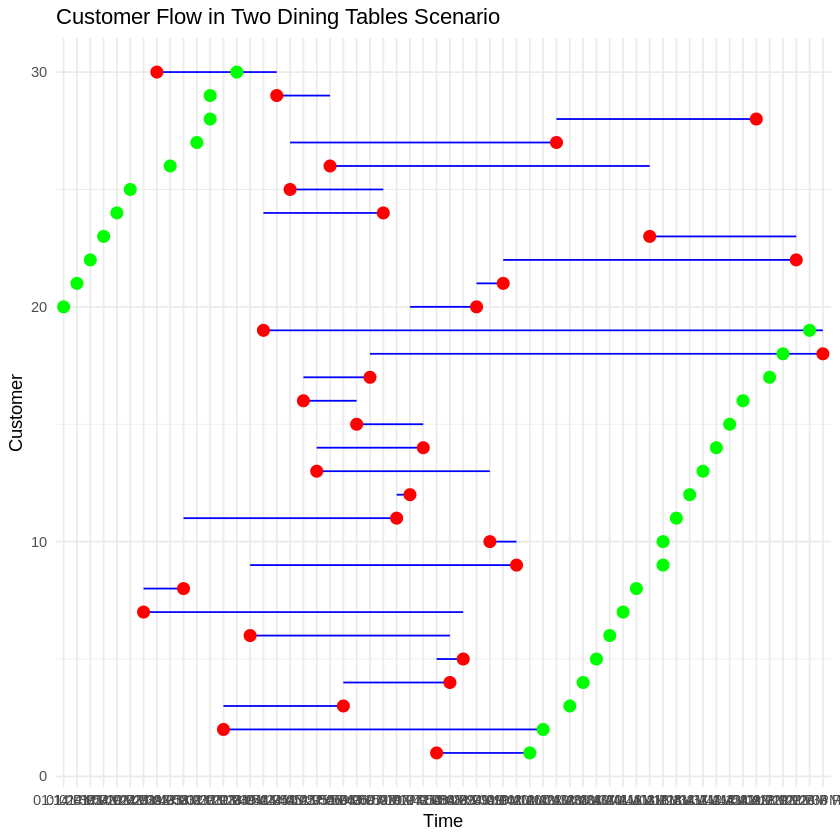

In [ ]:
simulate_two_tables <- function(arrival_times, service_times, start_hour = 10) {
  n <- length(arrival_times)
  table_free_time <- c(0, 0) # Free time for both tables in minutes since start_hour
  start_times <- numeric(n)
  end_times <- numeric(n)
  waiting_times <- numeric(n)

  for (i in 1:n) {
    # Assign to the table that becomes free first
    assigned_table <- which.min(table_free_time)
    if (arrival_times[i] >= table_free_time[assigned_table]) {
      start_times[i] <- arrival_times[i]
    } else {
      start_times[i] <- table_free_time[assigned_table]
    }
    waiting_times[i] <- start_times[i] - arrival_times[i]
    end_times[i] <- start_times[i] + service_times[i]
    table_free_time[assigned_table] <- end_times[i]
  }

  # Convert times to AM/PM format
  format_time <- function(time_in_minutes) {
    format(as.POSIXct((start_hour * 60 + time_in_minutes) * 60, origin = "1970-01-01", tz = "UTC"), "%I:%M %p")
  }
  arrival_times_formatted <- sapply(arrival_times, format_time)
  start_times_formatted <- sapply(start_times, format_time)
  end_times_formatted <- sapply(end_times, format_time)

  # Create raw data
  raw_data <- data.frame(
    Customer = 1:n,
    Arrival = arrival_times_formatted,
    Start = start_times_formatted,
    End = end_times_formatted,
    Waiting_Time = waiting_times
  )

  # Summary statistics
  avg_waiting_time <- mean(waiting_times)
  total_customers <- n
  total_downtime <- sum(diff(c(0, sort(end_times))) - diff(c(0, sort(arrival_times))))

  # Print summary statistics
  cat("Summary Statistics:\n")
  cat("Average Waiting Time:", avg_waiting_time, "minutes\n")
  cat("Total Customers Served:", total_customers, "\n")
  cat("Total Downtime:", total_downtime, "minutes\n")

  return(list(raw_data = raw_data))
}

# Example input data
set.seed(123) # For reproducibility
arrival_times <- cumsum(rexp(30, rate = 5 / 60)) # 30 customers arriving (Poisson process)
service_times <- rexp(30, rate = 1 / 10) * 60 # Service times in minutes

# Simulate and get results
result_two_tables <- simulate_two_tables(arrival_times, service_times)

# Output raw data
print(result_two_tables$raw_data)

# Plot Simulation Data
library(ggplot2)

plot_simulation <- function(simulation_data) {
  ggplot(simulation_data) +
    geom_segment(aes(x = Start, xend = End, y = Customer, yend = Customer), color = "blue") +
    geom_point(aes(x = Arrival, y = Customer), color = "green", size = 3, shape = 21, fill = "green") +
    geom_point(aes(x = End, y = Customer), color = "red", size = 3, shape = 21, fill = "red") +
    labs(
      x = "Time",
      y = "Customer",
      title = "Customer Flow in Two Dining Tables Scenario"
    ) +
    theme_minimal()
}

plot_simulation(result_two_tables$raw_data)


### **Subscenario 1.3: VIP Customers with Priority Service**


Summary Statistics:
Average Waiting Time (Overall): 12252.37 minutes
Average Waiting Time (VIP): 8800.11 minutes
Average Waiting Time (Regular): 14553.88 minutes
   Customer  Arrival    Start      End Waiting_Time Priority
1         1 10:10 AM 10:00 AM 07:40 AM     599.8313      VIP
2         2 10:17 AM 07:40 AM 12:44 PM    1900.4198      VIP
3         3 10:32 AM 12:44 PM 03:20 PM    2204.1235      VIP
4         4 10:33 AM 03:20 PM 05:18 PM    2359.8518      VIP
5         5 10:34 AM 05:18 PM 05:35 AM    3917.9759      VIP
6         6 10:37 AM 05:35 AM 01:30 PM    4655.3280      VIP
7         7 10:41 AM 01:30 PM 07:47 PM    5129.6742      VIP
8         8 10:43 AM 07:47 PM 08:20 AM    5507.2132  Regular
9         9 11:16 AM 08:20 AM 02:13 PM    6259.4526  Regular
10       10 11:16 AM 02:13 PM 01:31 AM    6612.6575  Regular
11       11 11:28 AM 01:31 AM 05:43 AM    7290.0306  Regular
12       12 11:34 AM 05:43 AM 05:50 AM    7542.1534  Regular
13       13 11:37 AM 05:50 AM 02:17 PM   1186

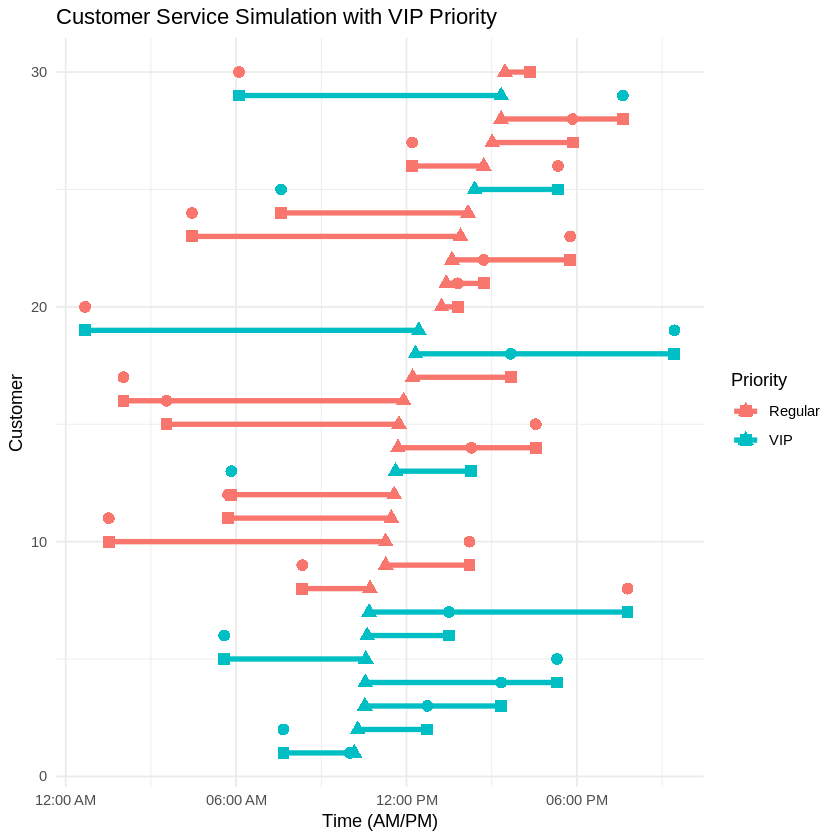

In [ ]:
library(ggplot2)

simulate_vip_priority <- function(arrival_times, service_times, vip_prob = 0.5, start_hour = 10) {
  n <- length(arrival_times)

  # Assign VIP status (1 for VIP, 0 for regular)
  is_vip <- rbinom(n, 1, vip_prob)
  vip_indices <- which(is_vip == 1)
  regular_indices <- which(is_vip == 0)

  # Separate VIP and regular customers
  vip_arrivals <- arrival_times[vip_indices]
  vip_services <- service_times[vip_indices]
  regular_arrivals <- arrival_times[regular_indices]
  regular_services <- service_times[regular_indices]

  # Merge VIPs and regular customers into a priority queue
  all_arrivals <- c(vip_arrivals, regular_arrivals)
  all_services <- c(vip_services, regular_services)
  priorities <- c(rep("VIP", length(vip_arrivals)), rep("Regular", length(regular_arrivals)))
  priority_order <- order(all_arrivals, priorities) # VIPs served first if arrival time is the same

  ordered_arrivals <- all_arrivals[priority_order]
  ordered_services <- all_services[priority_order]
  ordered_priorities <- priorities[priority_order]

  # Simulate the prioritized queue
  result <- simulate_restaurant(ordered_arrivals, ordered_services, start_hour)

  # Convert all time outputs to formatted AM/PM times
  formatted_arrivals <- format(as.POSIXct((start_hour * 60 + ordered_arrivals) * 60, origin = "1970-01-01", tz = "UTC"), "%I:%M %p")
  formatted_starts <- result$start_times
  formatted_ends <- result$end_times

  # Add priority and format to the raw data
  raw_data <- data.frame(
    Customer = 1:n,
    Arrival = formatted_arrivals,
    Start = formatted_starts,
    End = formatted_ends,
    Waiting_Time = result$waiting_times,
    Priority = ordered_priorities
  )

  # Summary statistics
  avg_waiting_time <- mean(result$waiting_times)
  avg_waiting_time_vip <- mean(result$waiting_times[ordered_priorities == "VIP"])
  avg_waiting_time_regular <- mean(result$waiting_times[ordered_priorities == "Regular"])

  cat("Summary Statistics:\n")
  cat("Average Waiting Time (Overall):", avg_waiting_time, "minutes\n")
  cat("Average Waiting Time (VIP):", avg_waiting_time_vip, "minutes\n")
  cat("Average Waiting Time (Regular):", avg_waiting_time_regular, "minutes\n")

  # Plot simulation
  plot_simulation <- function(raw_data) {
    # Convert formatted times back to POSIXct for plotting
    raw_data$Arrival <- as.POSIXct(raw_data$Arrival, format = "%I:%M %p", tz = "UTC")
    raw_data$Start <- as.POSIXct(raw_data$Start, format = "%I:%M %p", tz = "UTC")
    raw_data$End <- as.POSIXct(raw_data$End, format = "%I:%M %p", tz = "UTC")

    # Create a ggplot
    ggplot(raw_data, aes(x = Arrival, y = Customer, color = Priority)) +
      geom_segment(aes(xend = End, yend = Customer), size = 1.5) + # Line showing service duration
      geom_point(aes(x = Arrival), shape = 17, size = 3) + # Arrival time
      geom_point(aes(x = Start), shape = 16, size = 3) + # Start of service
      geom_point(aes(x = End), shape = 15, size = 3) + # End of service
      labs(
        title = "Customer Service Simulation with VIP Priority",
        x = "Time (AM/PM)",
        y = "Customer",
        color = "Priority"
      ) +
      scale_x_datetime(date_labels = "%I:%M %p") +
      theme_minimal()
  }

  # Generate the plot
  simulation_plot <- plot_simulation(raw_data)

  return(list(raw_data = raw_data, plot = simulation_plot))
}

# Example usage
result_vip <- simulate_vip_priority(arrival_times, service_times, vip_prob = 0.5, start_hour = 10)

# Print raw data
print(result_vip$raw_data)

# Plot the simulation
print(result_vip$plot)


### **Subscenario 1.4: Dynamic Service Rates Based on Gamma Distribution**


Summary Statistics:
Average Waiting Time: 0.006959911 minutes
Average Service Rate (Peak Hours): 0 jobs/hour
Average Service Rate (Off-Peak Hours): 2.496241 jobs/hour
   Customer  Arrival    Start      End Waiting_Time Service_Rate
1         1 10:23 AM 10:23 AM 10:24 AM   0.00000000    1.9695097
2         2 10:32 AM 10:32 AM 10:33 AM   0.00000000    2.0243047
3         3 10:33 AM 10:33 AM 10:34 AM   0.26821152    1.1592141
4         4 10:49 AM 10:49 AM 10:50 AM   0.00000000    2.1974511
5         5 10:50 AM 10:50 AM 10:50 AM   0.06274419    1.1582559
6         6 10:58 AM 10:58 AM 10:58 AM   0.00000000    3.0500060
7         7 11:02 AM 11:02 AM 11:02 AM   0.00000000    2.5993156
8         8 11:17 AM 11:17 AM 11:17 AM   0.00000000    1.4455987
9         9 11:22 AM 11:22 AM 11:24 AM   0.00000000    1.4968296
10       10 11:49 AM 11:49 AM 11:49 AM   0.00000000    2.3289318
11       11 12:09 PM 12:09 PM 12:09 PM   0.00000000    4.1729267
12       12 12:13 PM 12:13 PM 12:13 PM   0.00000000  

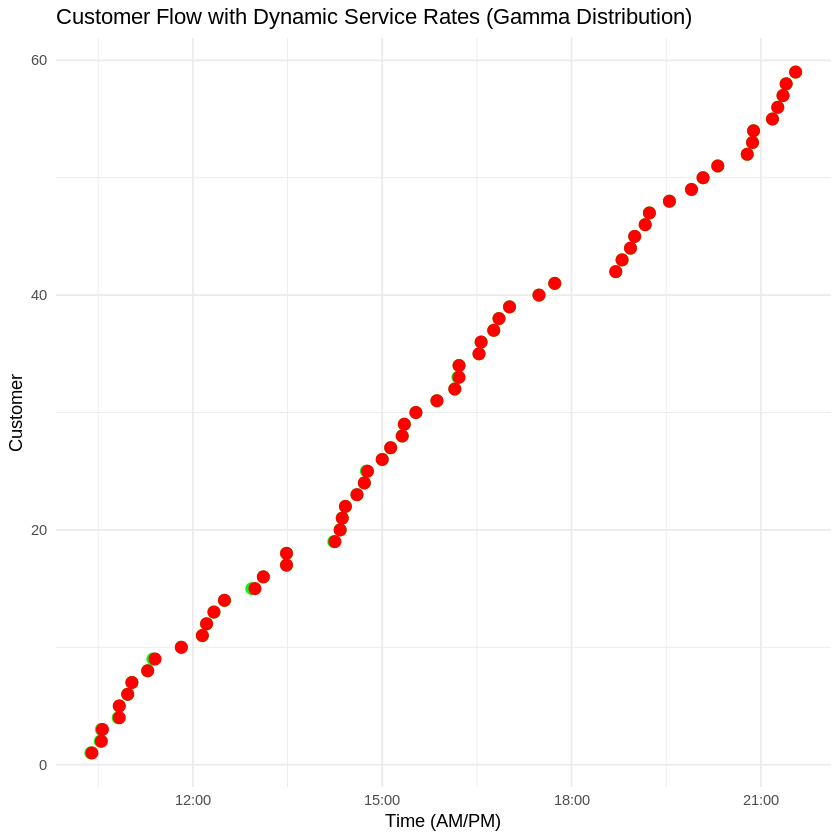

In [ ]:
simulate_dynamic_service_gamma <- function(lambda, start_hour, end_hour, peak_start, peak_end, shape_peak = 2, shape_offpeak = 5, scale_peak = 0.2, scale_offpeak = 0.5) {
  # Generate arrival times
  arrival_times <- generate_arrival_times(lambda, start_hour, end_hour)
  n <- length(arrival_times)

  # Generate service rates based on Gamma Distribution
  service_rates <- numeric(n)
  for (i in 1:n) {
    # Convert arrival times to minutes since the start of the day
    arrival_minutes <- sapply(arrival_times, function(at) {
      as.numeric(difftime(as.POSIXct(at, format = "%I:%M %p", tz = "UTC"),
                          as.POSIXct(start_hour * 60 * 60, origin = "1970-01-01", tz = "UTC"),
                          units = "mins"))
    })

    if (arrival_minutes[i] >= peak_start & arrival_minutes[i] < peak_end) {
      # Peak hours: Gamma distribution with smaller shape and scale (slower service)
      service_rates[i] <- rgamma(1, shape = shape_peak, scale = scale_peak)
    } else {
      # Off-peak hours: Gamma distribution with larger shape and scale (faster service)
      service_rates[i] <- rgamma(1, shape = shape_offpeak, scale = scale_offpeak)
    }
    # Ensure service rates are positive and have a minimum bound
    service_rates[i] <- max(service_rates[i], 0.1) # Avoid near-zero or negative rates
  }

  # Generate service times using dynamic service rates
  service_times <- rexp(n, rate = service_rates)

  # Simulate restaurant operations
  result <- simulate_restaurant(arrival_minutes, service_times, start_hour)

  # Convert numeric times back to AM/PM format
  arrival_times_formatted <- format(as.POSIXct((start_hour * 60 + arrival_minutes) * 60, origin = "1970-01-01", tz = "UTC"), "%I:%M %p")
  start_times_formatted <- format(as.POSIXct((start_hour * 60 + result$start_times) * 60, origin = "1970-01-01", tz = "UTC"), "%I:%M %p")
  end_times_formatted <- format(as.POSIXct((start_hour * 60 + result$end_times) * 60, origin = "1970-01-01", tz = "UTC"), "%I:%M %p")

  # Create raw data
  raw_data <- data.frame(
    Customer = 1:n,
    Arrival = arrival_times_formatted,
    Start = start_times_formatted,
    End = end_times_formatted,
    Waiting_Time = result$waiting_times,
    Service_Rate = service_rates
  )

  # Summary statistics
  avg_waiting_time <- mean(result$waiting_times, na.rm = TRUE)
  peak_indices <- arrival_minutes >= peak_start & arrival_minutes < peak_end
  offpeak_indices <- arrival_minutes < peak_start | arrival_minutes >= peak_end

  avg_service_rate_peak <- if (any(peak_indices)) {
    mean(service_rates[peak_indices], na.rm = TRUE)
  } else {
    0 # No customers during peak hours
  }

  avg_service_rate_offpeak <- if (any(offpeak_indices)) {
    mean(service_rates[offpeak_indices], na.rm = TRUE)
  } else {
    0 # No customers during off-peak hours
  }

  cat("Summary Statistics:\n")
  cat("Average Waiting Time:", avg_waiting_time, "minutes\n")
  cat("Average Service Rate (Peak Hours):", avg_service_rate_peak, "jobs/hour\n")
  cat("Average Service Rate (Off-Peak Hours):", avg_service_rate_offpeak, "jobs/hour\n")

  return(list(raw_data = raw_data))
}

# Parameters for simulation
start_hour <- 10
end_hour <- 22
peak_start <- 18 * 60  # 6 PM in minutes
peak_end <- 20 * 60    # 8 PM in minutes
lambda <- 5            # Arrival rate (jobs/hour)

# Run the simulation
result_dynamic_gamma <- simulate_dynamic_service_gamma(lambda, start_hour, end_hour, peak_start, peak_end)

# Output raw data
print(result_dynamic_gamma$raw_data)

# Visualization
plot_simulation <- function(simulation_data) {
  ggplot(simulation_data) +
    geom_segment(aes(
      x = as.POSIXct(Arrival, format = "%I:%M %p", tz = "UTC"),
      xend = as.POSIXct(End, format = "%I:%M %p", tz = "UTC"),
      y = Customer, yend = Customer
    ), color = "blue") +
    geom_point(aes(
      x = as.POSIXct(Arrival, format = "%I:%M %p", tz = "UTC"),
      y = Customer
    ), color = "green", size = 3, shape = 21, fill = "green") +
    geom_point(aes(
      x = as.POSIXct(End, format = "%I:%M %p", tz = "UTC"),
      y = Customer
    ), color = "red", size = 3, shape = 21, fill = "red") +
    labs(
      x = "Time (AM/PM)",
      y = "Customer",
      title = "Customer Flow with Dynamic Service Rates (Gamma Distribution)"
    ) +
    theme_minimal()
}

# Plot the simulation
plot_simulation(result_dynamic_gamma$raw_data)


# **Scenario 2**

Consider the setting with 5 dining tables and L chefs, with operating hours 10am - 10pm. Suppose customers arrive according to a Poisson process with a rate of λ<sub>A</sub> = 10 per hour. Once a customer arrives, their total service time can be modeled by an exponential distribution with rate λ<sub>S</sub> = 3L. Assume a customer spends 50 dollars per meal, and each chef earns a wage of 40 dollars per hour.

Plausible questions: Comment on the customer’s queueing experience in this setting, particularly we vary the number of chefs L. From a business perspective, how many chefs L should be hired to maximize profits with high probability? Justify your recommendation. Comment on the down-time of the restaurant throughout the day, and what this might means for business operation.

**1. Arrival Time Subprocedure that also generates the number of arrivals**


Given that arrival of customers as defined in Generalized scenario 2 depends solely on a Poisson process with a rate of λ<sub>A<sub> = 10 per hour.

- Assuming each arrival could either be individualistic or with a group such that the max number of people within a unit arrival as a group is 5 and that the maximum number of seats per table can always be matched. Thus we can always provide 5 seats per table. We use a geometric distribution for the members per arrival as it is safe to assume that Downtown Durham/ Ninth street area has relatively family-sized restaurants and the geom distribution models smaller groups as more likely, with decreasing probabilities for larger groups

In [53]:
generate_arrival_times_with_groups <- function(lambda_A, operating_hours, prob, L) {
  # Convert operating hours to total minutes
  total_time <- operating_hours * 60

  # Simulate arrival times based on the Poisson process
  arrival_times <- cumsum(rexp(ceiling(lambda_A * total_time / 60), rate = lambda_A / 60))

  # Filter out arrivals outside the operating hours
  arrival_times <- arrival_times[arrival_times <= total_time]

  # Generate corresponding group sizes (using a geometric distribution)
  n <- length(arrival_times)  # Number of arrivals
  group_sizes <- rgeom(n, prob = prob) + 1  # Geometric distribution +1 for group size starting at 1

  # Cap the group sizes at 5 (table limit)
  group_sizes <- pmin(group_sizes, 5)

  # Simulate service times based on exponential distribution (rate = λS = 3L)
  service_times <- rexp(n, rate = 3 * L)

  # Convert arrival times to actual times starting at 10:00 AM
  start_time <- as.POSIXct("10:00", format = "%H:%M")
  actual_times <- start_time + arrival_times * 60  # Convert minutes to seconds

  # Format the times as "HH:MM AM/PM"
  formatted_times <- format(actual_times, "%I:%M %p")

  # Combine arrival times with group sizes and service times
  arrival_info <- data.frame(
    Arrival_Time = formatted_times,
    Group_Size = group_sizes,
    Service_Time_Minutes = round(service_times, 2)
  )

  # Calculate total number of arrivals and customers
  total_arrivals <- n
  total_customers <- sum(group_sizes)

  # Return results as a list
  return(list(
    arrival_info = arrival_info,
    total_arrivals = total_arrivals,
    total_customers = total_customers
  ))
}

# Parameters
lambda_A <- 10  # Arrival rate per hour
operating_hours <- 12  # From 10 AM to 10 PM
prob <- 0.5  # Probability for geometric distribution
L <- 3  # Number of chefs

# Generate arrival times with group sizes and calculate totals
results <- generate_arrival_times_with_groups(lambda_A, operating_hours, prob, L)

# Display the results
cat("Arrival Times, Group Sizes, and Service Times:\n")
print(results$arrival_info)  # Arrival times, group sizes, and service times
cat("\nTotal Number of Arrivals:", results$total_arrivals, "\n")
cat("Total Number of Customers:", results$total_customers, "\n")


Arrival Times, Group Sizes, and Service Times:
    Arrival_Time Group_Size Service_Time_Minutes
1       10:03 AM          1                 0.04
2       10:07 AM          1                 0.23
3       10:08 AM          1                 0.41
4       10:25 AM          1                 0.11
5       10:29 AM          1                 0.03
6       10:35 AM          4                 0.11
7       10:36 AM          3                 0.08
8       10:44 AM          2                 0.05
9       10:48 AM          2                 0.10
10      10:48 AM          1                 0.04
11      10:54 AM          1                 0.25
12      10:55 AM          1                 0.02
13      10:56 AM          5                 0.02
14      11:01 AM          1                 0.03
15      11:04 AM          1                 0.02
16      11:08 AM          5                 0.04
17      11:09 AM          4                 0.28
18      11:14 AM          1                 0.02
19      11:19 AM      

**2. Serving time simulation of these customers before they leave.**

The serving time per customer we know in the generalized form depends on this condition: Once a customer arrives, their total service time can be modeled by an exponential distribution with rate λS = 3L
However we also recognize that this depends on the number of individuals within each arrival and thus we account for this by obtaining group sizes from above.

In [55]:
generate_service_times <- function(group_sizes, L) {
  # Calculate the service rate
  lambda_S <- 3 * L  # λS = 3L

  # Generate service times for all customers in all groups
  service_times <- lapply(group_sizes, function(group_size) {
    # Generate service times for the group based on exponential distribution
    rexp(group_size, rate = lambda_S)
  })

  # Flatten the list of service times into a single vector
  individual_service_times <- unlist(service_times)

  # Calculate total service time for each group (sum of individual times)
  group_service_times <- sapply(service_times, sum)

  # Return both individual and group-level service times
  return(list(
    individual_service_times = individual_service_times,
    group_service_times = group_service_times
  ))
}

# Example usage
set.seed(123)  # For reproducibility

# Parameters
group_sizes <- c(1, 2, 3, 1, 2, 1, 3, 4, 2, 5)  # Example group sizes (from the previous arrival model)
L <- 2  # Number of chefs

# Generate service times for each customer and group
service_times <- generate_service_times(group_sizes, L)

# Display the generated service times
cat("Individual service times (in minutes):\n")
print(service_times$individual_service_times)

cat("\nTotal service time for each group (in minutes):\n")
print(service_times$group_service_times)


Individual service times (in minutes):
 [1] 0.140576210 0.096101712 0.221509145 0.005262893 0.009368496 0.052750203
 [7] 0.052371215 0.024211134 0.454372744 0.004858908 0.167471676 0.080035788
[13] 0.046835605 0.062852972 0.031380673 0.141631022 0.260533923 0.079793403
[19] 0.098489139 0.673501952 0.140524955 0.160978535 0.247545966 0.224674081

Total service time for each group (in minutes):
 [1] 0.140576210 0.317610856 0.067381592 0.052371215 0.478583878 0.004858908
 [7] 0.294343069 0.496398590 0.178282542 1.447225489


**3. At a given time point, how many customers are waiting in line, how many customers are being served, and whether the restaurant is experiencing down-time.**

In [57]:
measure_customer_experience <- function(arrival_times, group_sizes, service_times, L, operating_hours) {
  # Convert operating hours to total minutes
  total_time <- operating_hours * 60

  # Initialize simulation variables
  current_time <- 0
  waiting_queue <- 0
  customers_being_served <- 0
  total_idle_time <- 0
  busy_time <- 0
  down_time_periods <- list()

  # Track peak and waiting times
  peak_waiting <- 0
  peak_serving <- 0
  last_event_time <- 0

  # Track individual group wait times
  waiting_times <- rep(0, length(arrival_times))

  # Combine arrival and departure events
  departure_times <- arrival_times + service_times
  events <- data.frame(
    time = c(arrival_times, departure_times),
    type = c(rep("arrival", length(arrival_times)), rep("departure", length(departure_times))),
    group_size = c(group_sizes, rep(0, length(departure_times)))  # Group sizes only matter for arrivals
  )

  # Sort events by time
  events <- events[order(events$time), ]

  # Process events
  for (i in 1:nrow(events)) {
    event <- events[i, ]
    event_time <- event$time
    event_type <- event$type
    group_size <- event$group_size

    # Update idle/busy times
    if (event_time > last_event_time) {
      if (customers_being_served > 0) {
        busy_time <- busy_time + (event_time - last_event_time)
      } else {
        total_idle_time <- total_idle_time + (event_time - last_event_time)
        down_time_periods <- append(down_time_periods, list(c(last_event_time, event_time)))
      }
    }

    # Update current time
    current_time <- event_time
    last_event_time <- current_time

    if (event_type == "arrival") {
      # Handle group arrival
      waiting_queue <- waiting_queue + group_size

      # Serve immediately if possible
      if (customers_being_served < L) {
        to_serve <- min(group_size, L - customers_being_served)
        waiting_queue <- waiting_queue - to_serve
        customers_being_served <- customers_being_served + to_serve
        group_wait_time <- 0
      } else {
        group_wait_time <- waiting_queue / group_size  # Approximate wait time for group
      }

      # Track waiting time
      waiting_times[which(arrival_times == event_time)] <- group_wait_time

      # Update peak queue size
      peak_waiting <- max(peak_waiting, waiting_queue)
    } else if (event_type == "departure") {
      # Handle departure
      customers_being_served <- max(0, customers_being_served - 1)
      peak_serving <- max(peak_serving, customers_being_served)

      # Serve next group in the queue if possible
      if (waiting_queue > 0) {
        to_serve <- min(waiting_queue, L - customers_being_served)
        waiting_queue <- waiting_queue - to_serve
        customers_being_served <- customers_being_served + to_serve
      }
    }
  }

  # Calculate chef utilization
  total_chefs_time <- total_time * L  # Total time all chefs could be working
  chef_utilization <- (busy_time / total_chefs_time) * 100

  # Calculate average and maximum wait times
  avg_wait_time <- mean(waiting_times)
  max_wait_time <- max(waiting_times)

  # Return results
  return(list(
    peak_waiting = peak_waiting,
    peak_serving = peak_serving,
    total_idle_time = total_idle_time,
    chef_utilization = chef_utilization,
    avg_wait_time = avg_wait_time,
    max_wait_time = max_wait_time,
    down_time_periods = down_time_periods,
    waiting_times = waiting_times
  ))
}

# Example Usage
lambda_A <- 10  # Arrival rate per hour
operating_hours <- 12  # From 10 AM to 10 PM
prob <- 0.5  # Probability for geometric distribution
L <- 3  # Number of chefs

# Simulated Data
arrival_times <- c(10, 20, 30, 40, 50, 60, 70, 80, 90, 100)  # Example arrival times (in minutes)
group_sizes <- c(1, 2, 3, 1, 2, 1, 3, 4, 2, 5)  # Example group sizes
service_times <- c(10, 12, 8, 15, 10, 7, 9, 20, 13, 18)  # Example service times (in minutes)

# Run the simulation
results <- measure_customer_experience(arrival_times, group_sizes, service_times, L, operating_hours)

# Display Results
cat("Peak Waiting Queue Size:", results$peak_waiting, "\n")
cat("Peak Serving Customers:", results$peak_serving, "\n")
cat("Total Idle Time:", results$total_idle_time, "minutes\n")
cat("Chef Utilization:", results$chef_utilization, "%\n")
cat("Average Wait Time:", results$avg_wait_time, "minutes\n")
cat("Maximum Wait Time:", results$max_wait_time, "minutes\n")

# Handle the 'down_time_periods' list
if (length(results$down_time_periods) > 0) {
  cat("Down Time Periods:\n")
  for (period in results$down_time_periods) {
    cat("  From:", period[1], "to:", period[2], "\n")
  }
} else {
  cat("No Down Time Periods\n")
}



Peak Waiting Queue Size: 14 
Peak Serving Customers: 2 
Total Idle Time: 10 minutes
Chef Utilization: 5 %
Average Wait Time: 1.588333 minutes
Maximum Wait Time: 4.5 minutes
Down Time Periods:
  From: 0 to: 10 


**4. The waiting time in line for an arriving customer**

The waiting time in line per customer depends on the serving rate/ chef efficiency and queue latency

In [66]:
calculate_waiting_time <- function(arrival_times, service_times, group_sizes, L) {
  # Initialize variables
  n <- length(arrival_times)  # Number of groups
  chef_end_times <- rep(0, L)  # Track when each chef will be free
  waiting_times <- numeric(n)  # Store waiting times for each group

  # Loop through each group
  for (i in 1:n) {
    group_size <- group_sizes[i]  # Current group size

    # Sort chef availability to find the earliest available chefs for this group
    sorted_chefs <- sort(chef_end_times, index.return = TRUE)
    earliest_chefs <- sorted_chefs$ix[1:min(group_size, L)]  # Select required chefs
    next_available_time <- max(chef_end_times[earliest_chefs])  # Latest free time among selected chefs

    # Calculate waiting time
    if (arrival_times[i] < next_available_time) {
      waiting_times[i] <- next_available_time - arrival_times[i]  # Wait until chefs are free
    } else {
      waiting_times[i] <- 0  # No waiting time if chefs are available
    }

    # Update end times for the chefs serving this group
    for (chef in earliest_chefs) {
      chef_end_times[chef] <- max(arrival_times[i], next_available_time) + service_times[i]
    }
  }

  return(waiting_times)
}

# Example usage
arrival_times <- c(10, 12, 15, 20, 25)  # Example arrival times (in minutes)
service_times <- c(5, 8, 6, 10, 7)      # Example service times (in minutes)
group_sizes <- c(1, 2, 1, 3, 2)         # Example group sizes
L <- 1  # Number of chefs

# Calculate waiting times
waiting_times <- calculate_waiting_time(arrival_times, service_times, group_sizes, L)

# Display results
cat("Waiting times for each group:\n")
print(waiting_times)


Waiting times for each group:
[1]  0  3  8  9 14


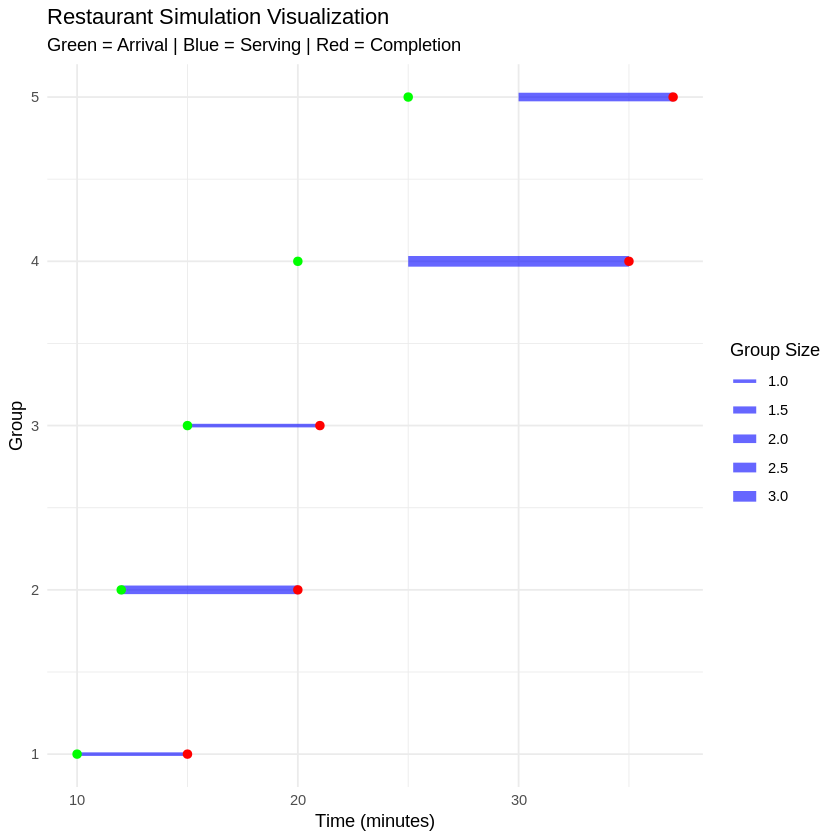

In [59]:
library(ggplot2)

plot_simulation <- function(arrival_times, start_times, end_times, group_sizes) {
  # Create a data frame for plotting
  df <- data.frame(
    Group = 1:length(arrival_times),
    Arrival = arrival_times,
    Start = start_times,
    End = end_times,
    GroupSize = group_sizes
  )

  # Plot the simulation
  ggplot(df) +
    # Visualize the serving duration as a segment
    geom_segment(aes(x = Start, xend = End, y = Group, yend = Group, size = GroupSize), color = "blue", alpha = 0.6) +
    # Mark the arrival points
    geom_point(aes(x = Arrival, y = Group), color = "green", size = 2) +
    # Mark the end points (completion)
    geom_point(aes(x = End, y = Group), color = "red", size = 2) +
    # Adjust plot labels and titles
    labs(
      x = "Time (minutes)",
      y = "Group",
      title = "Restaurant Simulation Visualization",
      subtitle = "Green = Arrival | Blue = Serving | Red = Completion",
      size = "Group Size"
    ) +
    # Adjust plot theme
    theme_minimal() +
    theme(legend.position = "right") +
    scale_size_continuous(range = c(1, 3))  # Adjust group size scale for visibility
}

# Example data (for testing)
arrival_times <- c(10, 12, 15, 20, 25)  # Example arrival times
start_times <- c(10, 12, 15, 25, 30)    # Example start times (service begins)
end_times <- c(15, 20, 21, 35, 37)      # Example end times (service completes)
group_sizes <- c(1, 2, 1, 3, 2)         # Example group sizes

# Plot the simulation
plot_simulation(arrival_times, start_times, end_times, group_sizes)


Comment on the customer’s queueing experience in this setting, particularly we vary the number of chefs L. From a business perspective, how many chefs L should be hired to maximize profits with high probability? Justify your recommendation. Comment on the down-time of the restaurant throughout the day, and what this might meansfor business operation.



# **More Possible Senarios to Consider**
Here are the 10 extensions with specific details added to guide the scenarios:

1. **Variable Customer Arrival Rates**:
   - Assume peak hours are 12:00 PM - 2:00 PM and 6:00 PM - 8:00 PM with a customer arrival rate of 15 customers/hour (Poisson process). Off-peak hours have a rate of 5 customers/hour. Analyze how these fluctuations impact waiting times and required staff levels.

2. **Customer Groups and Table Sizes**:
   - Assume 40% of arrivals are groups of 2, 30% groups of 4, and 30% single customers. Each group requires appropriately sized tables (2-seater, 4-seater). Simulate how accommodating these groups affects wait times and table utilization.

3. **Menu Complexity and Service Time**:
   - Introduce two menu types: a "Basic Menu" with an average service time of 15 minutes (Exponential, rate = 4) and a "Gourmet Menu" with an average service time of 30 minutes (Exponential, rate = 2). Determine how changing 50% of the orders to the Gourmet Menu affects overall service efficiency.

4. **Special Events or Promotions**:
   - Simulate a Friday night "Happy Hour" from 5:00 PM - 7:00 PM with an increased arrival rate of 20 customers/hour. Customers during this period spend an average of 30 dollars per meal instead of 50 dollars. Evaluate its profitability compared to regular evenings.

5. **Customer Patience and Abandonment**:
   - Assume customers are willing to wait up to 10 minutes on average (Exponential patience distribution with rate = 0.1). After this, 25% of them leave without being served. Analyze the impact of adding an extra chef to reduce abandonment rates.

6. **Multi-Level Staff Management**:
   - Introduce a model with 2 waitstaff for every chef, where waitstaff handle seating and order-taking, reducing the chef's service time from 15 minutes to 10 minutes on average (Exponential, rate = 6). Analyze how this division of labor impacts profits and downtime.

7. **Dynamic Pricing**:
   - Assume dynamic pricing increases meal costs by 20% during peak hours (lunch and dinner) and reduces them by 10% during off-peak hours. Evaluate its impact on daily revenue and peak-hour customer retention.

8. **Delivery and Takeout Orders**:
   - Assume 30% of customers during off-peak hours order takeout, requiring 75% of the service time of dine-in customers (Exponential service rate = 8). Analyze the kitchen workload and the effect on dine-in service times.

9. **Seasonal Variations**:
   - Assume summer months (June-August) increase arrival rates to 12 customers/hour on average, while winter months (December-February) reduce them to 8 customers/hour. Evaluate staffing and profitability adjustments required for these changes.

10. **Health and Safety Constraints**:
    - Simulate a social distancing policy limiting occupancy to 3 active dining tables at any time, with one chef per table. Customers have a 20% higher patience threshold (average of 12 minutes). Assess how this restriction affects customer satisfaction and revenue.

## Distribution Information
Here are the extensions with explicit processes and distributions for modeling:

1. **Variable Customer Arrival Rates**:
   - **Arrival Process**: Poisson process with rate λ = 15 customers/hour for peak hours (12 PM - 2 PM and 6 PM - 8 PM), λ = 5 customers/hour for off-peak hours.
   - **Service Times**: Exponential distribution with rate μ = 6 customers/hour.

2. **Customer Groups and Table Sizes**:
   - **Arrival Process**: Poisson process with λ = 10 customers/hour.
   - **Group Sizes**: Discrete distribution: P(single) = 0.3, P(group of 2) = 0.4, P(group of 4) = 0.3.
   - **Service Times**: Exponential distribution with rate μ= 4 (single), 2.5 (group of 2), 1.5 (group of 4).

3. **Menu Complexity and Service Time**:
   - **Arrival Process**: Poisson process with λ = 8 customers/hour.
   - **Service Times**: Mixture of two Exponential distributions: μ1= 4/hour (Basic Menu, probability 0.5), μ2 = 2/hour (Gourmet Menu, probability 0.5).

4. **Special Events or Promotions**:
   - **Arrival Process**: Poisson process with λ = 20 customers/hour during happy hour.
   - **Service Times**: Exponential distribution with rate μ = 5 customers/hour.
   - **Spending per Customer**: Uniform distribution U(25, 35) to model variations in spending during promotions.

5. **Customer Patience and Abandonment**:
   - **Arrival Process**: Poisson process with λ = 10 customers/hour.
   - **Service Times**: Exponential distribution with rate μ = 4 customers/hour.
   - **Patience Times**: Exponential distribution with rate v = 0.1 (mean patience = 10 minutes).

6. **Multi-Level Staff Management**:
   - **Arrival Process**: Poisson process with λ = 12 customers/hour.
   - **Service Times**: Exponential distribution with rate μ = 6 customers/hour when chefs are supported by waitstaff, μ = 4/hour without waitstaff.

7. **Dynamic Pricing**:
   - **Arrival Process**: Poisson process with λ = 15 customers/hour during peak hours,λ= 8 during off-peak.
   - **Service Times**: Exponential distribution with rate μ = 6/hour.
   - **Revenue per Customer**: Piecewise function: $60/customer (peak hours), $45/customer (off-peak).

8. **Delivery and Takeout Orders**:
   - **Arrival Process**: Poisson process with λ= 10 customers/hour.
   - **Takeout Proportion**: Bernoulli distribution with p = 0.3.
   - **Service Times**: Exponential distribution with rate μ = 6/hour (dine-in), μ = 8/hour (takeout).

9. **Seasonal Variations**:
   - **Arrival Process**: Poisson process with λ= 12 customers/hour (summer), λ = 8/hour (winter).
   - **Service Times**: Exponential distribution with rateμ = 6/hour.

10. **Health and Safety Constraints**:
    - **Arrival Process**: Poisson process with λ = 10 customers/hour.
    - **Service Times**: Exponential distribution with rate λ = 6/hour.
    - **Occupancy Constraint**: Uniform distribution U(2, 3)to randomly limit table availability at any given time.

These choices ensure alignment with probabilistic modeling, where Poisson processes are widely used for arrival times and exponential distributions for service times due to their memoryless properties, which are realistic for queueing systems.

### **Scenario 3: Menu Complexity and Service Time**

In [ ]:
simulate_menu_service <- function(lambda, hours, p_gourmet, rate_basic, rate_gourmet) {
  # Step 1: Generate customer arrivals (Poisson process)
  total_time <- hours * 60 # Convert hours to minutes
  arrival_times <- cumsum(rexp(ceiling(lambda * total_time / 60), rate = lambda / 60))
  arrival_times <- arrival_times[arrival_times <= total_time] # Filter within operating hours

  # Step 2: Assign menu types and generate service times
  n <- length(arrival_times)
  menu_types <- rbinom(n, 1, prob = p_gourmet) # 1 = Gourmet, 0 = Basic
  service_times <- ifelse(
    menu_types == 1,
    rexp(n, rate = rate_gourmet), # Gourmet Menu
    rexp(n, rate = rate_basic)   # Basic Menu
  )

  # Step 3: Simulate the service process
  start_times <- numeric(n)
  end_times <- numeric(n)
  waiting_times <- numeric(n)
  table_free_time <- 0

  for (i in 1:n) {
    if (arrival_times[i] >= table_free_time) {
      start_times[i] <- arrival_times[i]
    } else {
      start_times[i] <- table_free_time
    }
    waiting_times[i] <- start_times[i] - arrival_times[i]
    end_times[i] <- start_times[i] + service_times[i]
    table_free_time <- end_times[i]
  }

  # Step 4: Create raw data and calculate summary statistics
  raw_data <- data.frame(
    Customer = 1:n,
    Arrival = arrival_times,
    Start = start_times,
    End = end_times,
    Waiting_Time = waiting_times,
    Service_Time = service_times,
    Menu_Type = ifelse(menu_types == 1, "Gourmet", "Basic")
  )

  avg_waiting_time <- mean(waiting_times)
  avg_service_time <- mean(service_times)
  total_downtime <- sum(diff(c(0, sort(end_times))) - diff(c(0, sort(arrival_times))))

  cat("Summary Statistics:\n")
  cat("Average Waiting Time:", avg_waiting_time, "minutes\n")
  cat("Average Service Time:", avg_service_time, "minutes\n")
  cat("Total Downtime:", total_downtime, "minutes\n")
  cat("Number of Basic Menu Orders:", sum(menu_types == 0), "\n")
  cat("Number of Gourmet Menu Orders:", sum(menu_types == 1), "\n")

  return(list(raw_data = raw_data))
}

# Parameters
lambda <- 8             # Arrival rate (customers/hour)
hours <- 10             # Operating hours
p_gourmet <- 0.5        # Probability of Gourmet Menu
rate_basic <- 4         # Rate for Basic Menu (1 service per 15 minutes on average)
rate_gourmet <- 2       # Rate for Gourmet Menu (1 service per 30 minutes on average)

# Run simulation
result_menu <- simulate_menu_service(lambda, hours, p_gourmet, rate_basic, rate_gourmet)

# Output raw data
print(result_menu$raw_data)


Summary Statistics:
Average Waiting Time: 0.02148861 minutes
Average Service Time: 0.3277508 minutes
Total Downtime: 0.2975321 minutes
Number of Basic Menu Orders: 39 
Number of Gourmet Menu Orders: 28 
   Customer    Arrival      Start        End Waiting_Time Service_Time
1         1   4.049807   4.049807   4.569520   0.00000000  0.519713068
2         2   4.744601   4.744601   5.136988   0.00000000  0.392387170
3         3  44.667975  44.667975  45.044714   0.00000000  0.376739759
4         4  49.907631  49.907631  50.032248   0.00000000  0.124617219
5         5  70.580312  70.580312  70.654133   0.00000000  0.073820785
6         6  76.167033  76.167033  76.244566   0.00000000  0.077532328
7         7  76.220799  76.244566  76.537477   0.02376703  0.292910785
8         8  84.536512  84.536512  84.652846   0.00000000  0.116334274
9         9  91.290019  91.290019  91.639264   0.00000000  0.349244610
10       10  97.208043  97.208043  97.419386   0.00000000  0.211343008
11       11 100.

Summary Statistics:
Average Waiting Time: 0.04441862 minutes
Average Service Time: 0.4479152 minutes
Total Downtime: 0.05841763 minutes
Number of Basic Menu Orders: 33 
Number of Gourmet Menu Orders: 47 


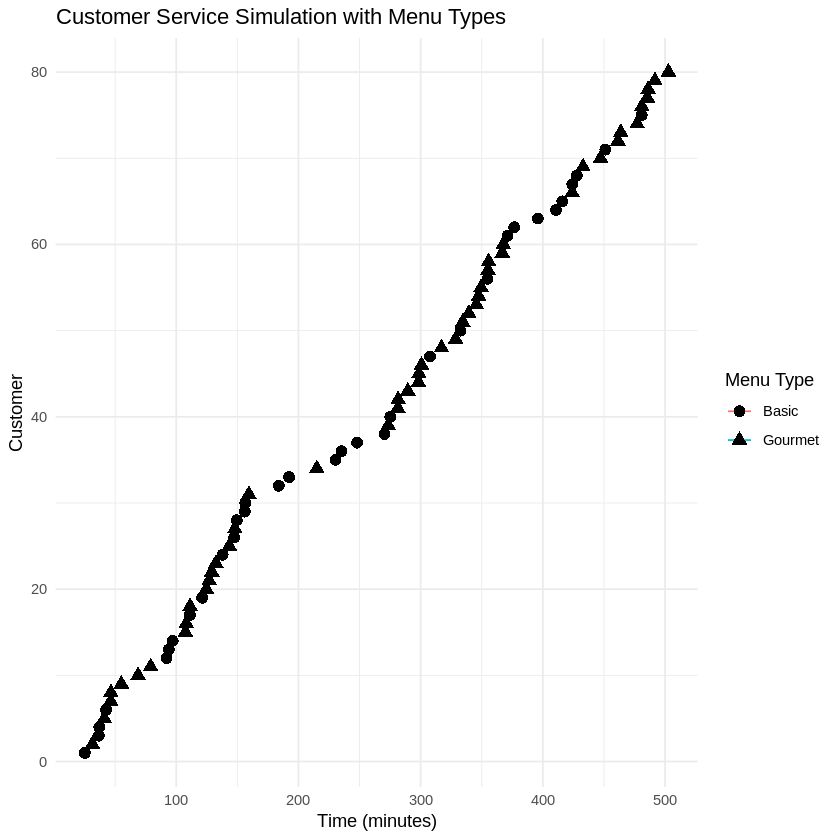

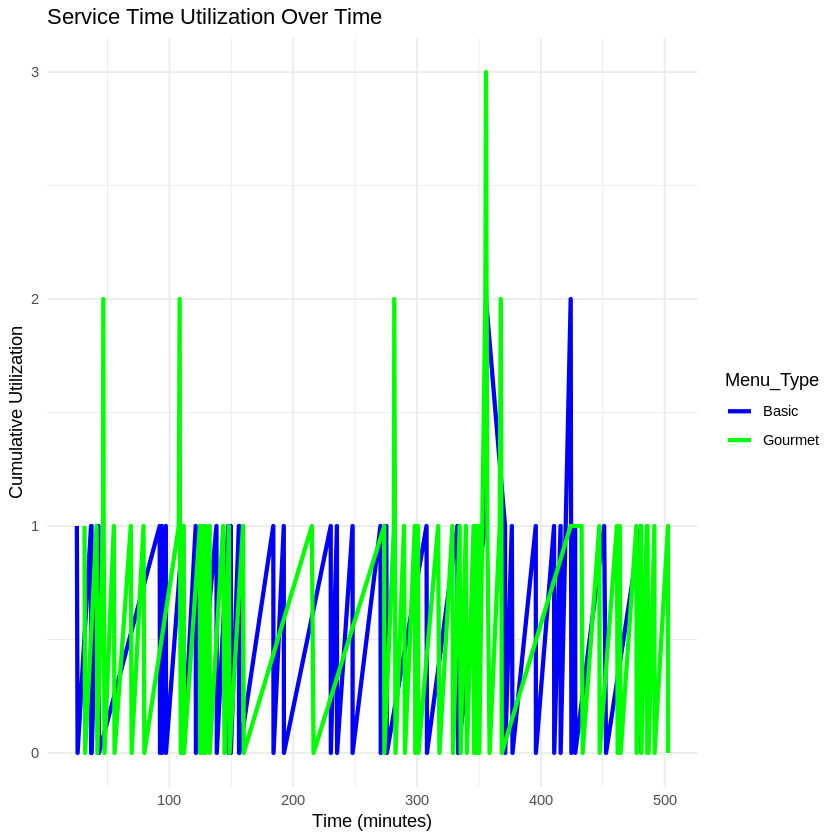

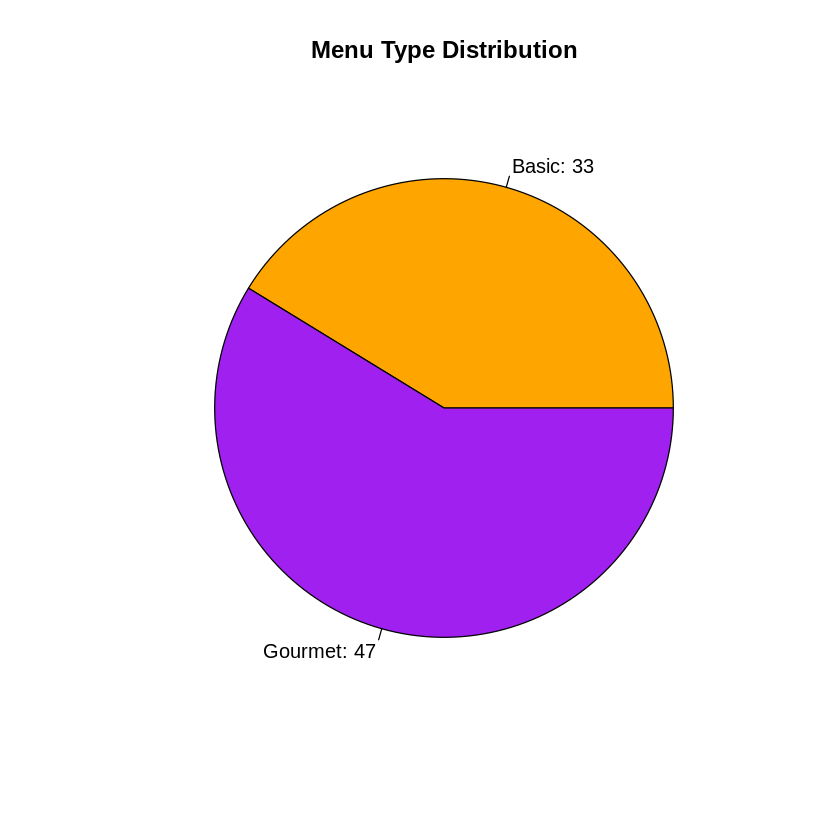

In [ ]:
# Pie Chart of Menu Types
plot_menu_type_pie <- function(simulation_data) {
  menu_counts <- table(simulation_data$Menu_Type)
  pie(menu_counts,
      labels = paste(names(menu_counts), ": ", menu_counts, sep = ""),
      col = c("orange", "purple"),
      main = "Menu Type Distribution")
}


# Service Time Utilization Over Time (Line Chart)
plot_service_utilization <- function(simulation_data) {
  # Create a time series of service events
  timeline <- data.frame(
    Time = c(simulation_data$Arrival, simulation_data$End),
    Event = c(rep("Start", nrow(simulation_data)), rep("End", nrow(simulation_data))),
    Menu_Type = rep(simulation_data$Menu_Type, 2)
  )

  timeline <- timeline[order(timeline$Time), ]
  timeline$Utilization <- ifelse(timeline$Event == "Start", 1, -1)
  timeline$Cumulative_Utilization <- cumsum(timeline$Utilization)

  ggplot(timeline, aes(x = Time, y = Cumulative_Utilization, color = Menu_Type)) +
    geom_line(size = 1.2) +
    labs(
      title = "Service Time Utilization Over Time",
      x = "Time (minutes)",
      y = "Cumulative Utilization"
    ) +
    theme_minimal() +
    scale_color_manual(values = c("Basic" = "blue", "Gourmet" = "green"))
}

# Service Time Utilization Over Time (Line Chart)
plot_service_utilization <- function(simulation_data) {
  # Create a time series of service events
  timeline <- data.frame(
    Time = c(simulation_data$Arrival, simulation_data$End),
    Event = c(rep("Start", nrow(simulation_data)), rep("End", nrow(simulation_data))),
    Menu_Type = rep(simulation_data$Menu_Type, 2)
  )

  timeline <- timeline[order(timeline$Time), ]
  timeline$Utilization <- ifelse(timeline$Event == "Start", 1, -1)
  timeline$Cumulative_Utilization <- cumsum(timeline$Utilization)

  ggplot(timeline, aes(x = Time, y = Cumulative_Utilization, color = Menu_Type)) +
    geom_line(size = 1.2) +
    labs(
      title = "Service Time Utilization Over Time",
      x = "Time (minutes)",
      y = "Cumulative Utilization"
    ) +
    theme_minimal() +
    scale_color_manual(values = c("Basic" = "blue", "Gourmet" = "green"))
}



# Run the simulation
lambda <- 8             # Arrival rate (customers/hour)
hours <- 10             # Operating hours
p_gourmet <- 0.5        # Probability of Gourmet Menu
rate_basic <- 4         # Rate for Basic Menu (1 service per 15 minutes on average)
rate_gourmet <- 2       # Rate for Gourmet Menu (1 service per 30 minutes on average)

result_menu <- simulate_menu_service(lambda, hours, p_gourmet, rate_basic, rate_gourmet)

# Visualization 1: Timeline of Customers (Existing ggplot Visualization)
plot_menu_simulation(result_menu$raw_data)

# Visualization 2: Service Time Utilization Over Time
plot_service_utilization(result_menu$raw_data)

# Visualization 3: Pie Chart of Menu Types
plot_menu_type_pie(result_menu$raw_data)


### **Scenario 7: Dynamic Pricing**



Summary Statistics:
Total Revenue: 5760 USD
Peak-Hour Customer Retention: 100 %
Average Waiting Time (All): 0.00913469 minutes
Average Waiting Time (Peak): 0.009563077 minutes
Average Waiting Time (Off-Peak): 0.008599205 minutes
[1] "Raw Data for Dynamic Pricing Scenario:"
   Customer   Arrival     Start       End Waiting_Time Service_Time Revenue
1         1  1.849106  1.849106  2.326572    0.0000000   0.47746638      60
2         2  2.422165  2.422165  2.451026    0.0000000   0.02886143      60
3         3  5.555375  5.555375  5.723987    0.0000000   0.16861159      60
4         4 10.960959 10.960959 11.136469    0.0000000   0.17551003      60
5         5 19.090257 19.090257 19.152500    0.0000000   0.06224314      60
6         6 19.695960 19.695960 19.806602    0.0000000   0.11064150      60
7         7 20.617125 20.617125 20.646607    0.0000000   0.02948139      60
8         8 21.674329 21.674329 21.792595    0.0000000   0.11826565      60
9         9 26.917770 26.917770 27.678719 

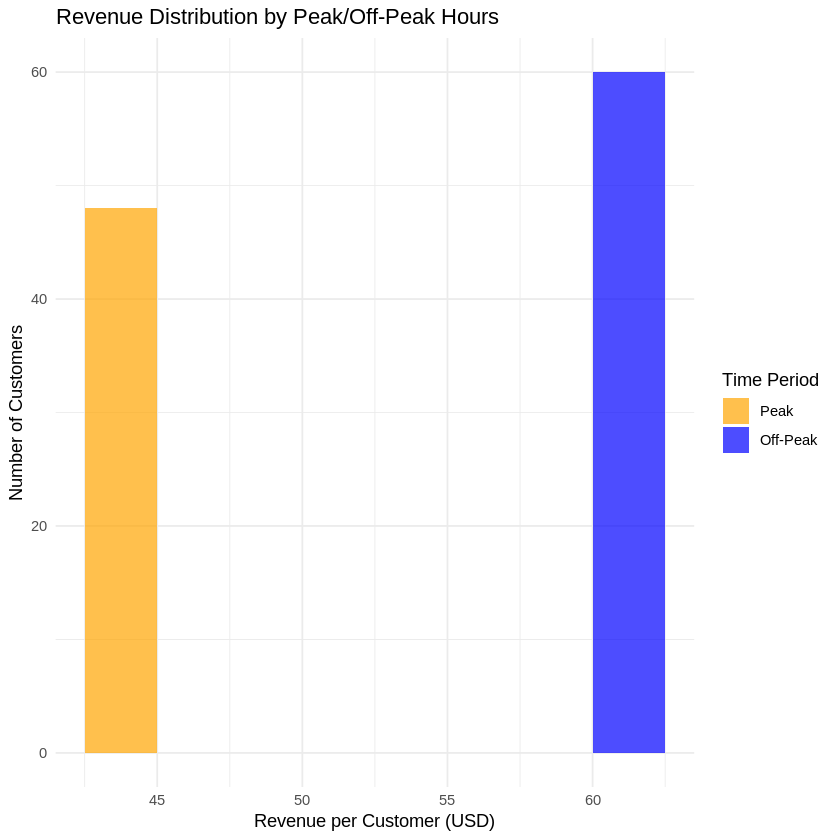

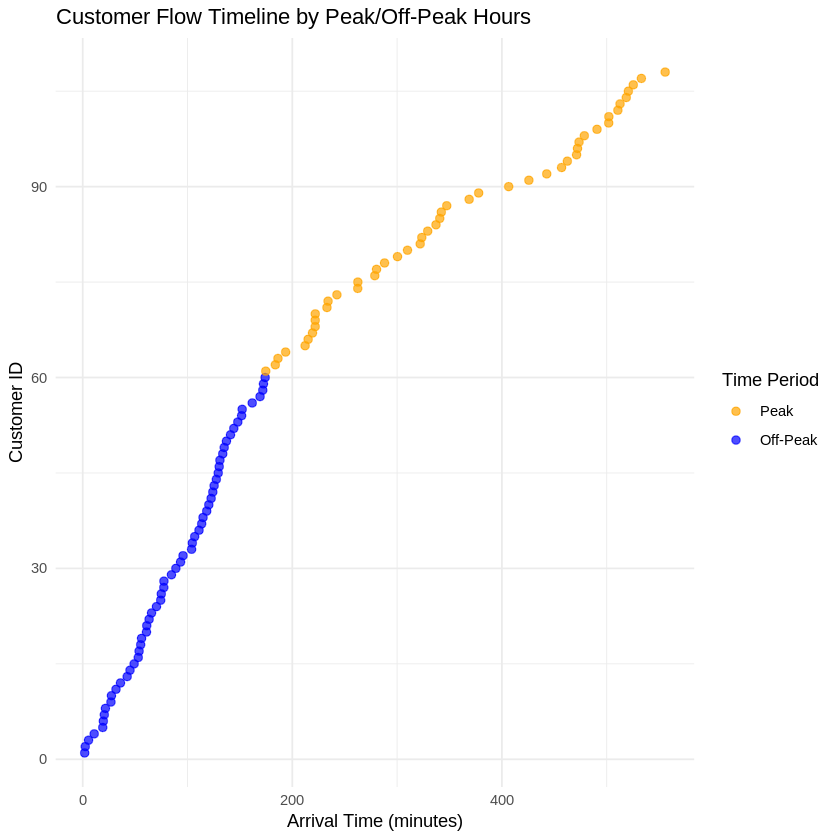

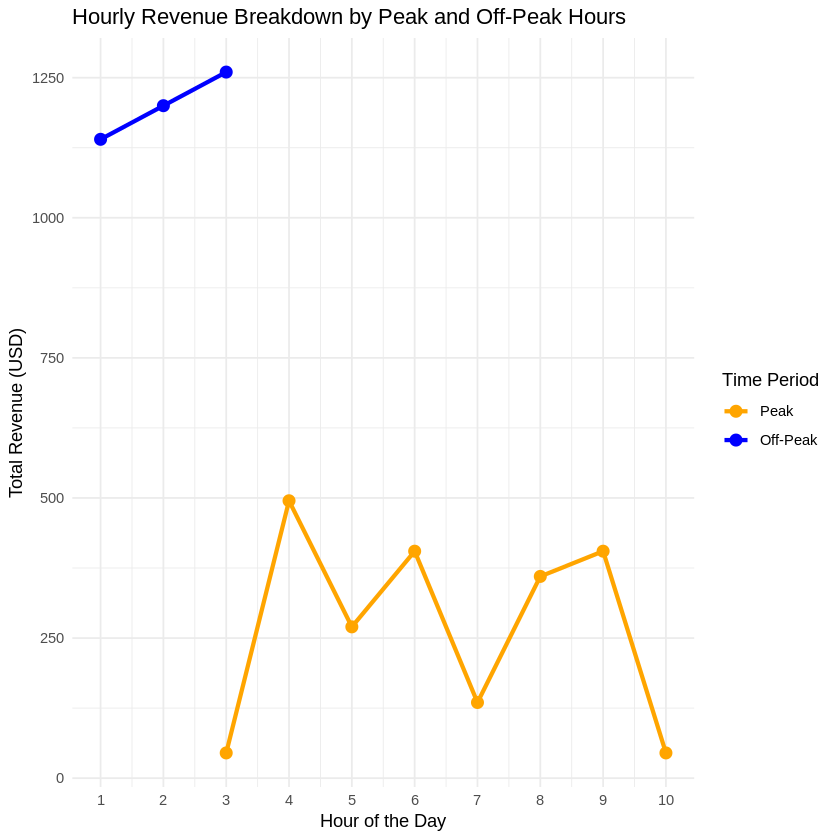

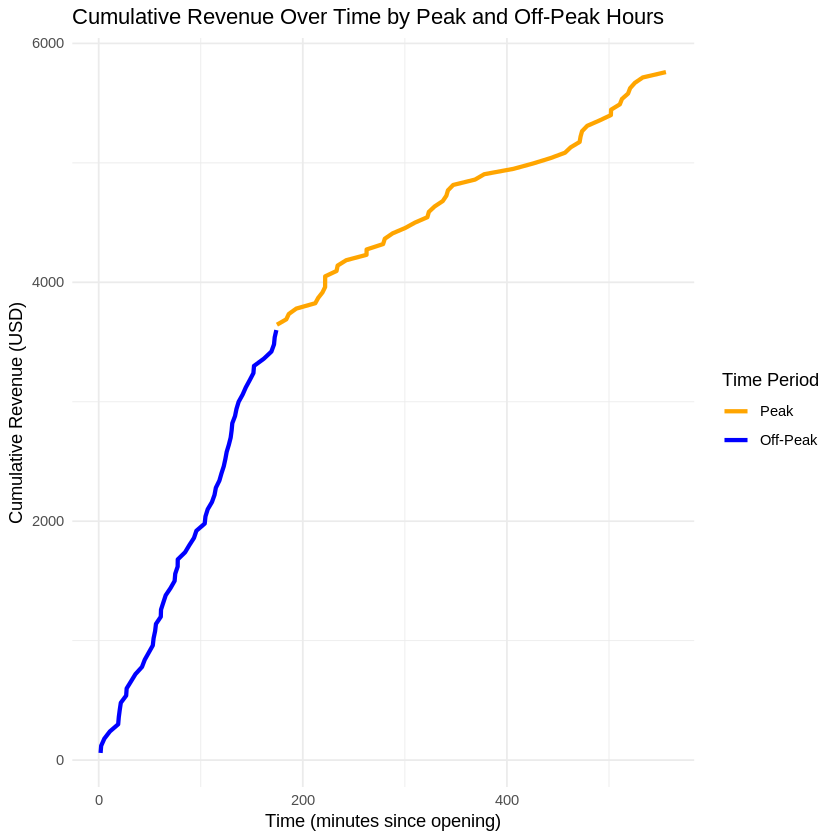

In [ ]:
library(ggplot2)

# Simulate dynamic pricing with customer retention and revenue analysis
simulate_dynamic_pricing <- function(peak_lambda, off_peak_lambda, peak_hours, off_peak_hours, service_rate, peak_revenue, off_peak_revenue) {
  # Step 1: Generate customer arrivals for peak and off-peak hours
  peak_arrival_times <- cumsum(rexp(ceiling(peak_lambda * peak_hours), rate = peak_lambda / 60))
  off_peak_arrival_times <- cumsum(rexp(ceiling(off_peak_lambda * off_peak_hours), rate = off_peak_lambda / 60))

  # Adjust arrival times for peak and off-peak periods
  off_peak_arrival_times <- off_peak_arrival_times + max(peak_arrival_times, na.rm = TRUE)

  # Combine peak and off-peak arrivals
  arrival_times <- c(peak_arrival_times, off_peak_arrival_times)
  n <- length(arrival_times)

  # Step 2: Assign service times (Exponential distribution)
  service_times <- rexp(n, rate = service_rate)

  # Step 3: Determine revenue based on arrival time
  is_peak <- arrival_times <= max(peak_arrival_times)
  revenues <- ifelse(is_peak, peak_revenue, off_peak_revenue)

  # Step 4: Simulate service process
  start_times <- numeric(n)
  end_times <- numeric(n)
  waiting_times <- numeric(n)
  table_free_time <- 0

  for (i in 1:n) {
    if (arrival_times[i] >= table_free_time) {
      start_times[i] <- arrival_times[i]
    } else {
      start_times[i] <- table_free_time
    }
    waiting_times[i] <- start_times[i] - arrival_times[i]
    end_times[i] <- start_times[i] + service_times[i]
    table_free_time <- end_times[i]
  }

  # Calculate total revenue and peak-hour customer retention
  total_revenue <- sum(revenues)
  peak_customer_retention <- sum(is_peak) / ceiling(peak_lambda * peak_hours)

  # Create raw data
  raw_data <- data.frame(
    Customer = 1:n,
    Arrival = arrival_times,
    Start = start_times,
    End = end_times,
    Waiting_Time = waiting_times,
    Service_Time = service_times,
    Revenue = revenues,
    Is_Peak = is_peak
  )

  # Print summary statistics
  cat("Summary Statistics:\n")
  cat("Total Revenue:", total_revenue, "USD\n")
  cat("Peak-Hour Customer Retention:", round(peak_customer_retention * 100, 2), "%\n")
  cat("Average Waiting Time (All):", mean(waiting_times), "minutes\n")
  cat("Average Waiting Time (Peak):", mean(waiting_times[is_peak]), "minutes\n")
  cat("Average Waiting Time (Off-Peak):", mean(waiting_times[!is_peak]), "minutes\n")

  return(list(raw_data = raw_data, total_revenue = total_revenue, peak_retention = peak_customer_retention))
}

# Visualization 1: Revenue Distribution by Peak/Off-Peak
plot_revenue_distribution <- function(simulation_data) {
  ggplot(simulation_data, aes(x = Revenue, fill = Is_Peak)) +
    geom_histogram(binwidth = 5, position = "dodge", alpha = 0.7) +
    scale_fill_manual(values = c("TRUE" = "blue", "FALSE" = "orange"), labels = c("Peak", "Off-Peak")) +
    labs(
      title = "Revenue Distribution by Peak/Off-Peak Hours",
      x = "Revenue per Customer (USD)",
      y = "Number of Customers",
      fill = "Time Period"
    ) +
    theme_minimal()
}

# Visualization 2: Customer Flow Timeline
plot_customer_flow <- function(simulation_data) {
  ggplot(simulation_data, aes(x = Arrival, y = Customer, color = Is_Peak)) +
    geom_point(size = 2, alpha = 0.7) +
    scale_color_manual(values = c("TRUE" = "blue", "FALSE" = "orange"), labels = c("Peak", "Off-Peak")) +
    labs(
      title = "Customer Flow Timeline by Peak/Off-Peak Hours",
      x = "Arrival Time (minutes)",
      y = "Customer ID",
      color = "Time Period"
    ) +
    theme_minimal()
}

# Visualization 3: Hourly Revenue Line Chart
plot_hourly_revenue <- function(simulation_data, peak_hours, off_peak_hours) {
  # Add an Hour column to categorize revenue by hour
  simulation_data$Hour <- floor(simulation_data$Arrival / 60) + 1 # Convert minutes to hours

  # Summarize revenue by hour
  hourly_revenue <- aggregate(Revenue ~ Hour + Is_Peak, data = simulation_data, sum)

  # Create line plot
  ggplot(hourly_revenue, aes(x = Hour, y = Revenue, color = Is_Peak, group = Is_Peak)) +
    geom_line(size = 1.2) +
    geom_point(size = 3) +
    scale_color_manual(values = c("TRUE" = "blue", "FALSE" = "orange"), labels = c("Peak", "Off-Peak")) +
    labs(
      title = "Hourly Revenue Breakdown by Peak and Off-Peak Hours",
      x = "Hour of the Day",
      y = "Total Revenue (USD)",
      color = "Time Period"
    ) +
    theme_minimal() +
    scale_x_continuous(breaks = seq(1, peak_hours + off_peak_hours, by = 1))
}

# Visualization 4: Cumulative Revenue Over Time
plot_cumulative_revenue <- function(simulation_data) {
  # Add cumulative revenue calculation
  simulation_data <- simulation_data[order(simulation_data$Arrival), ] # Sort by arrival time
  simulation_data$Cumulative_Revenue <- cumsum(simulation_data$Revenue)

  # Create the plot
  ggplot(simulation_data, aes(x = Arrival, y = Cumulative_Revenue, color = Is_Peak)) +
    geom_line(size = 1.2) +
    scale_color_manual(values = c("TRUE" = "blue", "FALSE" = "orange"), labels = c("Peak", "Off-Peak")) +
    labs(
      title = "Cumulative Revenue Over Time by Peak and Off-Peak Hours",
      x = "Time (minutes since opening)",
      y = "Cumulative Revenue (USD)",
      color = "Time Period"
    ) +
    theme_minimal()
}

# Parameters
peak_lambda <- 15       # Arrival rate during peak hours (customers/hour)
off_peak_lambda <- 8    # Arrival rate during off-peak hours (customers/hour)
peak_hours <- 4         # Duration of peak hours (in hours)
off_peak_hours <- 6     # Duration of off-peak hours (in hours)
service_rate <- 6       # Service rate (1 customer per 10 minutes)
peak_revenue <- 60      # Revenue per customer during peak hours
off_peak_revenue <- 45  # Revenue per customer during off-peak hours

# Run simulation
result_pricing <- simulate_dynamic_pricing(peak_lambda, off_peak_lambda, peak_hours, off_peak_hours, service_rate, peak_revenue, off_peak_revenue)

# Display raw data
display_raw_data <- function(simulation_data) {
  print("Raw Data for Dynamic Pricing Scenario:")
  print(head(simulation_data, 10)) # Display the first 10 rows for readability
}

# Run the cumulative revenue calculation for raw data
prepare_raw_data <- function(simulation_data) {
  # Sort by arrival time and calculate cumulative revenue
  simulation_data <- simulation_data[order(simulation_data$Arrival), ]
  simulation_data$Cumulative_Revenue <- cumsum(simulation_data$Revenue)
  return(simulation_data)
}

# Prepare and display raw data
prepared_raw_data <- prepare_raw_data(result_pricing$raw_data)
display_raw_data(prepared_raw_data)

# Visualization 1: Revenue Distribution
plot_revenue_distribution(result_pricing$raw_data)

# Visualization 2: Customer Flow Timeline
plot_customer_flow(result_pricing$raw_data)

# Run the hourly revenue plot
plot_hourly_revenue(result_pricing$raw_data, peak_hours, off_peak_hours)

# Run the cumulative revenue plot
plot_cumulative_revenue(result_pricing$raw_data)


### **Scenario 8: Delivery and Takeout Orders**

Summary Statistics:
Total Customers: 79 
Average Waiting Time: 0.005930163 minutes
Average Service Time (Dine-In): 0.1582192 minutes
Average Service Time (Takeout): 0.1062802 minutes
[1] "Raw Data for Delivery and Takeout Orders:"
   Customer  Arrival    Start      End Waiting_Time Service_Time Customer_Type
1         1 21.17861 21.17861 21.20438            0   0.02577036       Dine-In
2         2 37.61647 37.61647 37.85150            0   0.23502914       Dine-In
3         3 56.96906 56.96906 57.07219            0   0.10313192       Dine-In
4         4 57.67756 57.67756 57.90408            0   0.22652175       Dine-In
5         5 58.19273 58.19273 58.33829            0   0.14556586       Dine-In
6         6 63.94414 63.94414 64.18539            0   0.24125026       Dine-In
7         7 72.80916 72.80916 73.00783            0   0.19866925       Dine-In
8         8 74.49966 74.49966 74.57784            0   0.07818758       Dine-In
9         9 82.24341 82.24341 82.57609            0   0.33

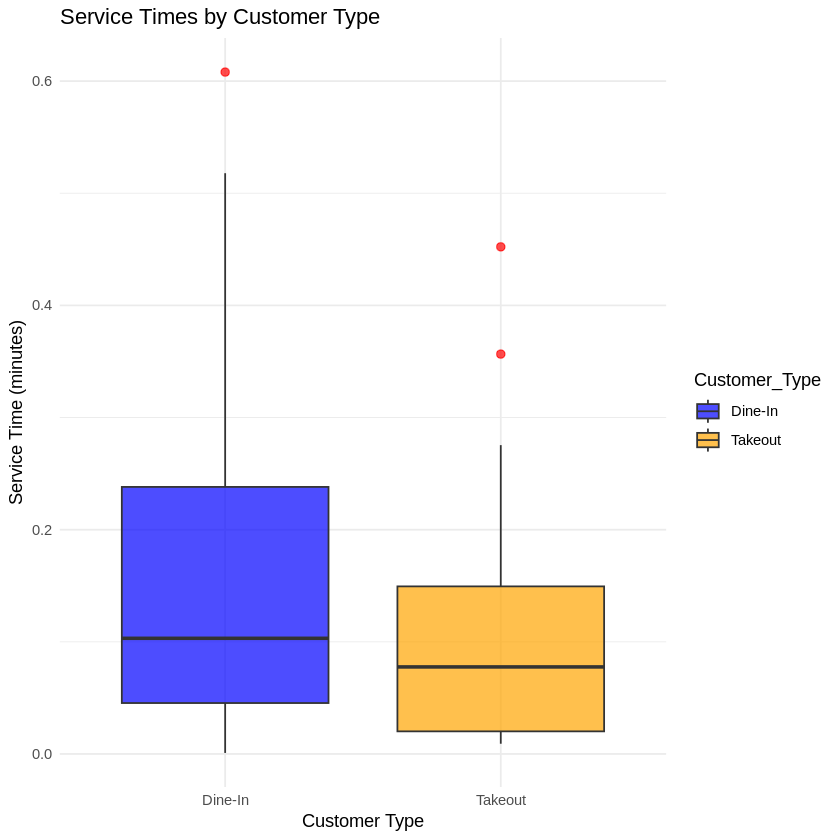

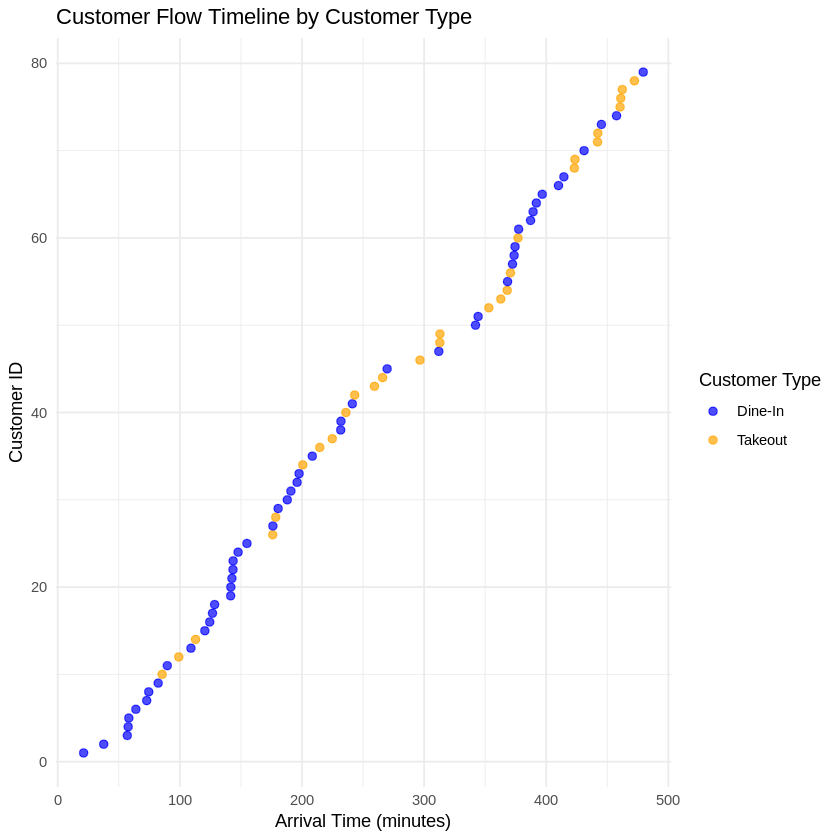

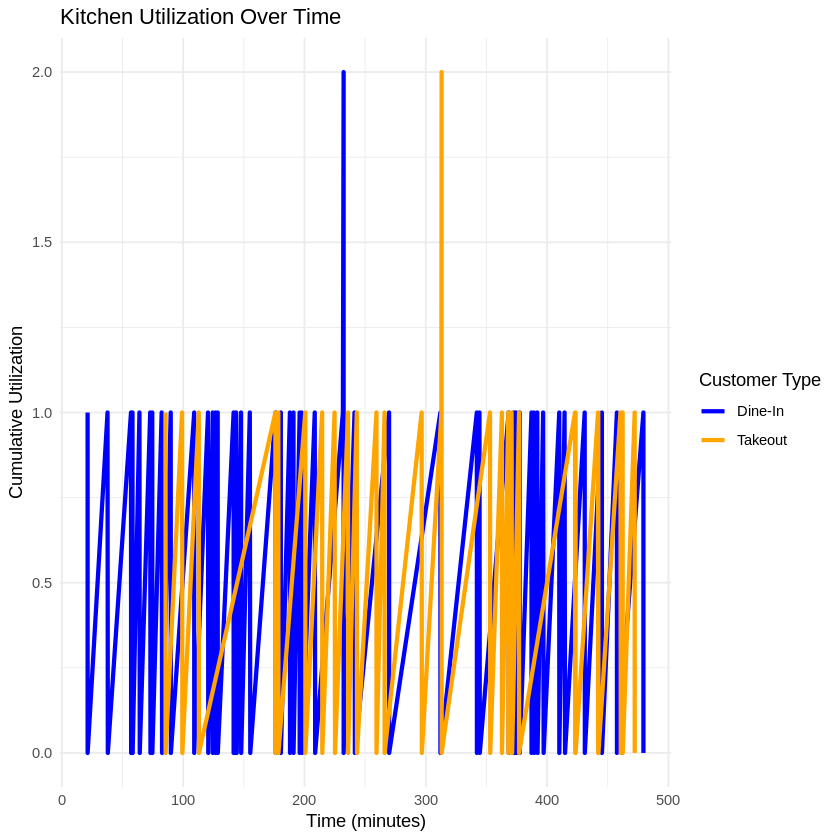

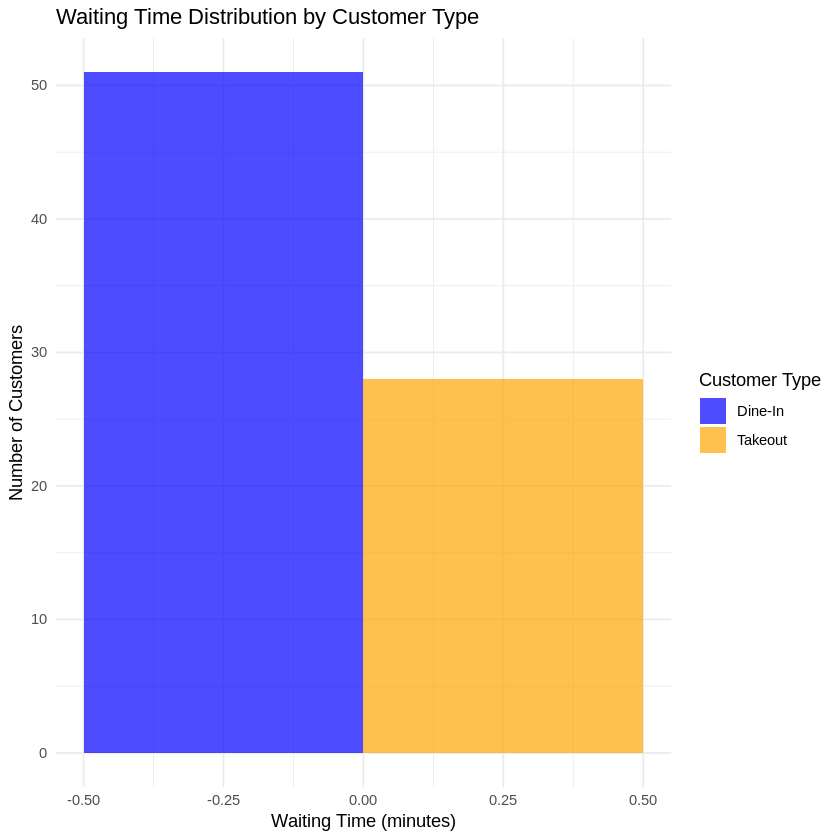

In [ ]:
library(ggplot2)

# Function to simulate delivery and takeout orders
simulate_delivery_takeout <- function(lambda, hours, takeout_prob, rate_dine_in, rate_takeout) {
  # Step 1: Generate customer arrivals (Poisson process)
  total_time <- hours * 60 # Convert hours to minutes
  arrival_times <- cumsum(rexp(ceiling(lambda * total_time / 60), rate = lambda / 60))
  arrival_times <- arrival_times[arrival_times <= total_time] # Keep arrivals within operating hours

  # Step 2: Assign customer types (Dine-in or Takeout)
  n <- length(arrival_times)
  is_takeout <- rbinom(n, 1, takeout_prob) # 1 = Takeout, 0 = Dine-in

  # Step 3: Assign service times based on customer type
  service_times <- ifelse(
    is_takeout == 1,
    rexp(n, rate = rate_takeout), # Takeout service time
    rexp(n, rate = rate_dine_in)  # Dine-in service time
  )

  # Step 4: Simulate service process
  start_times <- numeric(n)
  end_times <- numeric(n)
  waiting_times <- numeric(n)
  table_free_time <- 0

  for (i in 1:n) {
    if (arrival_times[i] >= table_free_time) {
      start_times[i] <- arrival_times[i]
    } else {
      start_times[i] <- table_free_time
    }
    waiting_times[i] <- start_times[i] - arrival_times[i]
    end_times[i] <- start_times[i] + service_times[i]
    table_free_time <- end_times[i]
  }

  # Create raw data
  raw_data <- data.frame(
    Customer = 1:n,
    Arrival = arrival_times,
    Start = start_times,
    End = end_times,
    Waiting_Time = waiting_times,
    Service_Time = service_times,
    Customer_Type = ifelse(is_takeout == 1, "Takeout", "Dine-In")
  )

  # Summary statistics
  avg_waiting_time <- mean(waiting_times)
  avg_service_time_dine_in <- mean(service_times[is_takeout == 0])
  avg_service_time_takeout <- mean(service_times[is_takeout == 1])
  total_customers <- n

  cat("Summary Statistics:\n")
  cat("Total Customers:", total_customers, "\n")
  cat("Average Waiting Time:", avg_waiting_time, "minutes\n")
  cat("Average Service Time (Dine-In):", avg_service_time_dine_in, "minutes\n")
  cat("Average Service Time (Takeout):", avg_service_time_takeout, "minutes\n")

  return(list(raw_data = raw_data))
}

# Visualization 1: Service Times by Customer Type (Boxplot)
plot_service_times_boxplot <- function(simulation_data) {
  ggplot(simulation_data, aes(x = Customer_Type, y = Service_Time, fill = Customer_Type)) +
    geom_boxplot(alpha = 0.7, outlier.color = "red", outlier.size = 2) +
    labs(
      title = "Service Times by Customer Type",
      x = "Customer Type",
      y = "Service Time (minutes)"
    ) +
    theme_minimal() +
    scale_fill_manual(values = c("Takeout" = "orange", "Dine-In" = "blue"))
}

# Visualization 2: Customer Flow Timeline
plot_customer_flow <- function(simulation_data) {
  ggplot(simulation_data, aes(x = Arrival, y = Customer, color = Customer_Type)) +
    geom_point(size = 2, alpha = 0.7) +
    scale_color_manual(values = c("Takeout" = "orange", "Dine-In" = "blue")) +
    labs(
      title = "Customer Flow Timeline by Customer Type",
      x = "Arrival Time (minutes)",
      y = "Customer ID",
      color = "Customer Type"
    ) +
    theme_minimal()
}

# Visualization 3: Kitchen Utilization Over Time
plot_kitchen_utilization <- function(simulation_data) {
  # Create timeline data
  timeline <- data.frame(
    Time = c(simulation_data$Start, simulation_data$End),
    Event = c(rep("Start", nrow(simulation_data)), rep("End", nrow(simulation_data))),
    Customer_Type = rep(simulation_data$Customer_Type, 2)
  )
  timeline <- timeline[order(timeline$Time), ]
  timeline$Utilization <- ifelse(timeline$Event == "Start", 1, -1)
  timeline$Cumulative_Utilization <- cumsum(timeline$Utilization)

  ggplot(timeline, aes(x = Time, y = Cumulative_Utilization, color = Customer_Type)) +
    geom_line(size = 1.2) +
    scale_color_manual(values = c("Takeout" = "orange", "Dine-In" = "blue")) +
    labs(
      title = "Kitchen Utilization Over Time",
      x = "Time (minutes)",
      y = "Cumulative Utilization",
      color = "Customer Type"
    ) +
    theme_minimal()
}

# Visualization 4: Waiting Time Distribution by Customer Type
plot_waiting_time_histogram <- function(simulation_data) {
  ggplot(simulation_data, aes(x = Waiting_Time, fill = Customer_Type)) +
    geom_histogram(binwidth = 1, position = "dodge", alpha = 0.7) +
    scale_fill_manual(values = c("Takeout" = "orange", "Dine-In" = "blue")) +
    labs(
      title = "Waiting Time Distribution by Customer Type",
      x = "Waiting Time (minutes)",
      y = "Number of Customers",
      fill = "Customer Type"
    ) +
    theme_minimal()
}

# Parameters
lambda <- 10            # Arrival rate (customers/hour)
hours <- 8              # Operating hours
takeout_prob <- 0.3     # Probability of takeout order
rate_dine_in <- 6       # Service rate for dine-in (1 customer per 10 minutes)
rate_takeout <- 8       # Service rate for takeout (1 customer per 7.5 minutes)

# Run simulation
result_delivery_takeout <- simulate_delivery_takeout(lambda, hours, takeout_prob, rate_dine_in, rate_takeout)

# Display raw data
print("Raw Data for Delivery and Takeout Orders:")
print(head(result_delivery_takeout$raw_data, 10)) # Display first 10 rows of raw data

# Visualization 1: Service Times by Customer Type
plot_service_times_boxplot(result_delivery_takeout$raw_data)

# Visualization 2: Customer Flow Timeline
plot_customer_flow(result_delivery_takeout$raw_data)

# Visualization 3: Kitchen Utilization Over Time
plot_kitchen_utilization(result_delivery_takeout$raw_data)

# Visualization 4: Waiting Time Distribution by Customer Type
plot_waiting_time_histogram(result_delivery_takeout$raw_data)


## **Scenario 9: Seasonal Variation**

Summary Statistics:
Total Customers (Summer): 8640 
Total Customers (Winter): 5760 
Average Waiting Time (Overall): 0 minutes
Average Service Time: 0.17 minutes
Raw Data for Seasonal Variations (in Minutes):
   Customer Arrival_Minutes Start_Minutes End_Minutes Waiting_Time_Minutes
1         1            0.17          0.17        0.51                    0
2         2            6.79          6.79        7.18                    0
3         3            7.96          7.96        8.65                    0
4         4            9.04          9.04        9.11                    0
5         5           22.51         22.51       22.79                    0
6         6           22.95         22.95       23.02                    0
7         7           25.09         25.09       25.24                    0
8         8           36.22         36.22       36.29                    0
9         9           42.58         42.58       42.77                    0
10       10           48.49         48.49 

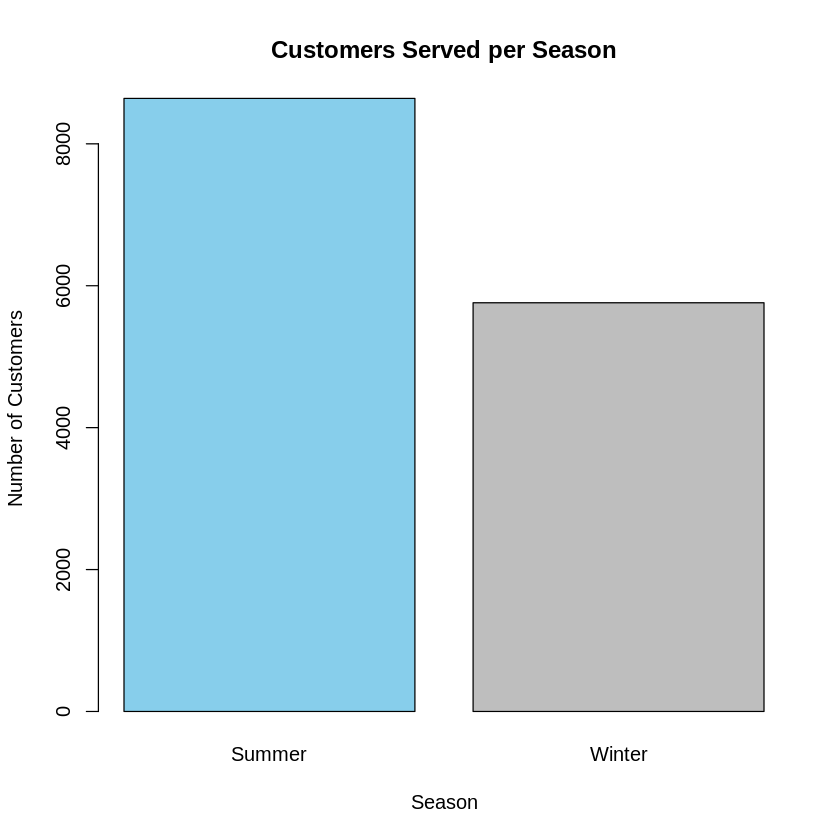

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


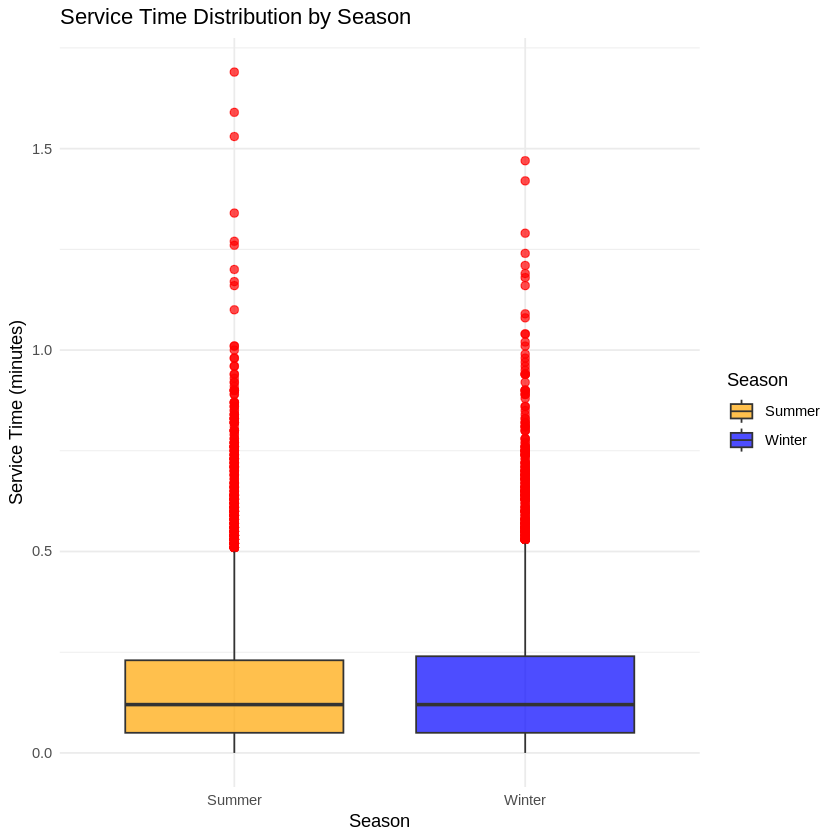

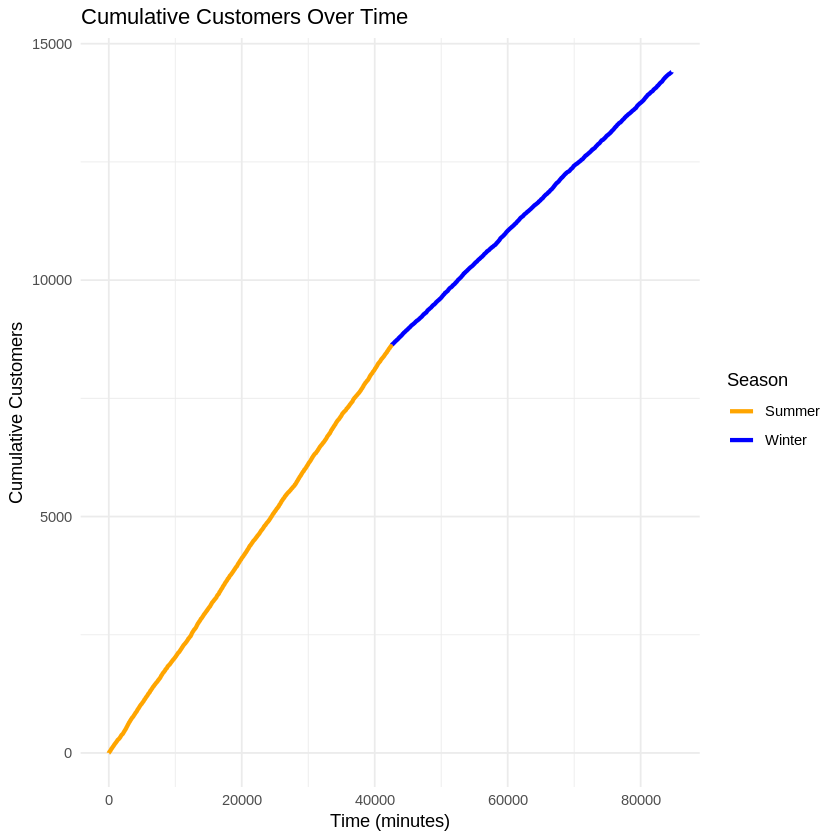

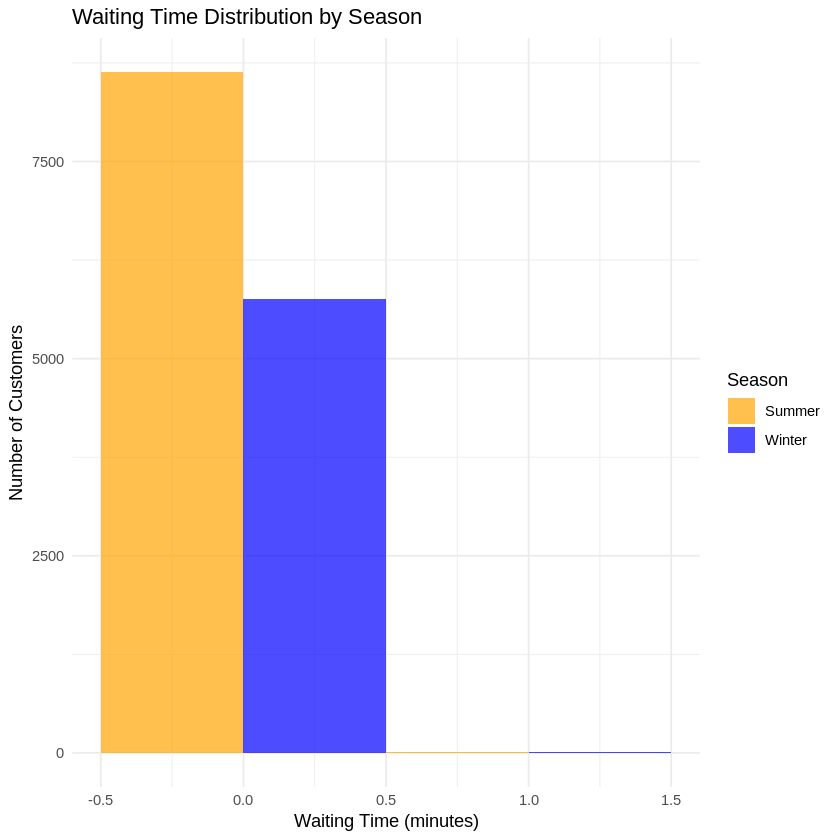

In [ ]:
library(ggplot2)

# Function to simulate seasonal variations
simulate_seasonal_variations <- function(lambda_summer, lambda_winter, service_rate, hours_per_day, days_per_season) {
  # Generate arrival times for summer (higher arrival rate)
  summer_arrivals <- cumsum(rexp(ceiling(lambda_summer * hours_per_day * days_per_season), rate = lambda_summer / 60))

  # Generate arrival times for winter (lower arrival rate)
  winter_arrivals <- cumsum(rexp(ceiling(lambda_winter * hours_per_day * days_per_season), rate = lambda_winter / 60))
  winter_arrivals <- winter_arrivals + max(summer_arrivals) # Offset winter times to follow summer

  # Combine summer and winter arrivals
  arrival_times <- c(summer_arrivals, winter_arrivals)
  season_labels <- c(rep("Summer", length(summer_arrivals)), rep("Winter", length(winter_arrivals)))

  # Generate service times (Exponential)
  n <- length(arrival_times)
  service_times <- rexp(n, rate = service_rate)

  # Simulate service process
  start_times <- numeric(n)
  end_times <- numeric(n)
  waiting_times <- numeric(n)
  table_free_time <- 0

  for (i in 1:n) {
    if (arrival_times[i] >= table_free_time) {
      start_times[i] <- arrival_times[i]
    } else {
      start_times[i] <- table_free_time
    }
    waiting_times[i] <- start_times[i] - arrival_times[i]
    end_times[i] <- start_times[i] + service_times[i]
    table_free_time <- end_times[i]
  }

  # Create raw data
  raw_data <- data.frame(
    Customer = 1:n,
    Arrival_Minutes = round(arrival_times, 2),
    Start_Minutes = round(start_times, 2),
    End_Minutes = round(end_times, 2),
    Waiting_Time_Minutes = round(waiting_times, 2),
    Service_Time_Minutes = round(service_times, 2),
    Season = season_labels
  )

  # Summary statistics
  avg_waiting_time <- mean(waiting_times)
  avg_service_time <- mean(service_times)
  total_customers_summer <- sum(season_labels == "Summer")
  total_customers_winter <- sum(season_labels == "Winter")

  cat("Summary Statistics:\n")
  cat("Total Customers (Summer):", total_customers_summer, "\n")
  cat("Total Customers (Winter):", total_customers_winter, "\n")
  cat("Average Waiting Time (Overall):", round(avg_waiting_time, 2), "minutes\n")
  cat("Average Service Time:", round(avg_service_time, 2), "minutes\n")

  return(list(raw_data = raw_data))
}

# Visualization 1: Customers Served per Season
plot_customers_per_season <- function(simulation_data) {
  season_counts <- table(simulation_data$Season)
  barplot(season_counts,
          col = c("skyblue", "gray"),
          main = "Customers Served per Season",
          ylab = "Number of Customers",
          xlab = "Season")
}

# Visualization 2: Service Time Distribution by Season (Boxplot)
plot_service_times_boxplot <- function(simulation_data) {
  ggplot(simulation_data, aes(x = Season, y = Service_Time_Minutes, fill = Season)) +
    geom_boxplot(alpha = 0.7, outlier.color = "red", outlier.size = 2) +
    labs(
      title = "Service Time Distribution by Season",
      x = "Season",
      y = "Service Time (minutes)"
    ) +
    theme_minimal() +
    scale_fill_manual(values = c("Summer" = "orange", "Winter" = "blue"))
}

# Visualization 3: Cumulative Customers Over Time
plot_cumulative_customers <- function(simulation_data) {
  simulation_data <- simulation_data[order(simulation_data$Arrival_Minutes), ] # Sort by arrival time
  simulation_data$Cumulative_Customers <- 1:nrow(simulation_data)

  ggplot(simulation_data, aes(x = Arrival_Minutes, y = Cumulative_Customers, color = Season)) +
    geom_line(size = 1.2) +
    scale_color_manual(values = c("Summer" = "orange", "Winter" = "blue")) +
    labs(
      title = "Cumulative Customers Over Time",
      x = "Time (minutes)",
      y = "Cumulative Customers",
      color = "Season"
    ) +
    theme_minimal()
}

# Visualization 4: Waiting Time Distribution by Season
plot_waiting_time_histogram <- function(simulation_data) {
  ggplot(simulation_data, aes(x = Waiting_Time_Minutes, fill = Season)) +
    geom_histogram(binwidth = 1, position = "dodge", alpha = 0.7) +
    scale_fill_manual(values = c("Summer" = "orange", "Winter" = "blue")) +
    labs(
      title = "Waiting Time Distribution by Season",
      x = "Waiting Time (minutes)",
      y = "Number of Customers",
      fill = "Season"
    ) +
    theme_minimal()
}

# Parameters
lambda_summer <- 12     # Arrival rate in summer (customers/hour)
lambda_winter <- 8      # Arrival rate in winter (customers/hour)
service_rate <- 6       # Service rate (1 customer per 10 minutes)
hours_per_day <- 8      # Operating hours per day
days_per_season <- 90   # Number of days in each season

# Run simulation
result_seasonal <- simulate_seasonal_variations(lambda_summer, lambda_winter, service_rate, hours_per_day, days_per_season)

# Display raw data
cat("Raw Data for Seasonal Variations (in Minutes):\n")
print(head(result_seasonal$raw_data, 10)) # Display first 10 rows of raw data

# Visualization 1: Customers Served per Season
plot_customers_per_season(result_seasonal$raw_data)

# Visualization 2: Service Time Distribution by Season
plot_service_times_boxplot(result_seasonal$raw_data)

# Visualization 3: Cumulative Customers Over Time
plot_cumulative_customers(result_seasonal$raw_data)

# Visualization 4: Waiting Time Distribution by Season
plot_waiting_time_histogram(result_seasonal$raw_data)


## **Scenario 10: Health and Safety Constraints**

In [ ]:
install.packages("DT")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘crosstalk’




Summary Statistics:
Total Customers (Summer): 8640 
Total Customers (Winter): 5760 
Served Customers: 14400 
Total Revenue: 288000 USD
Average Waiting Time (Served Customers): 0 minutes


Warning message in instance$preRenderHook(instance):
“It seems your data is too big for client-side DataTables. You may consider server-side processing: https://rstudio.github.io/DT/server.html”


HTML widgets cannot be represented in plain text (need html)

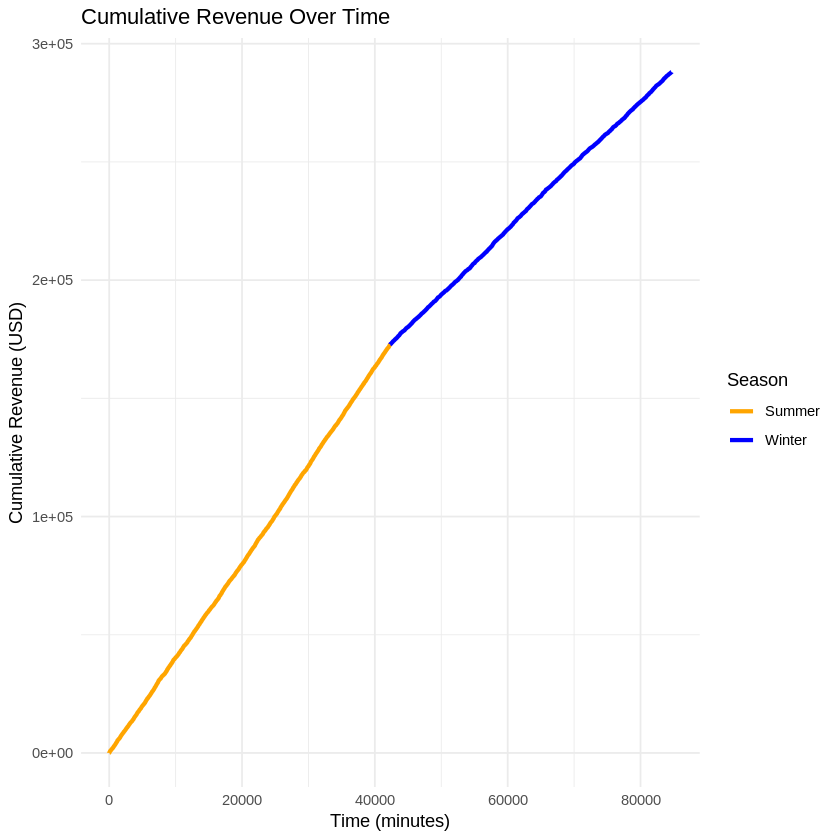

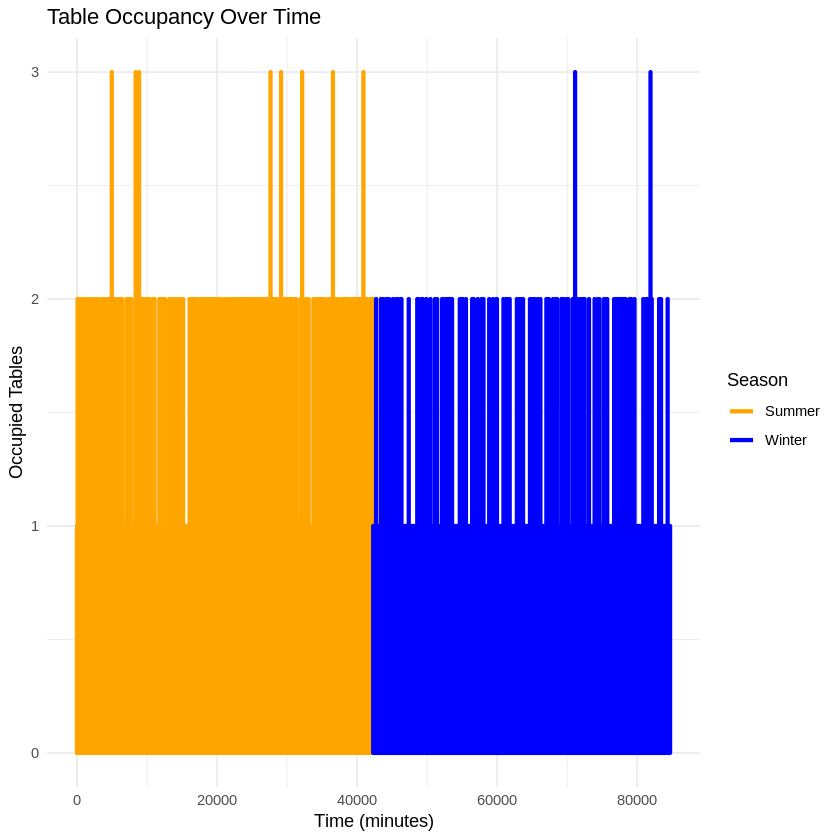

In [ ]:
library(ggplot2)
library(DT)

# Simulate health and safety constraints
simulate_health_safety <- function(lambda_summer, lambda_winter, service_rate, hours_per_day, days_per_season, patience_threshold) {
  # Generate arrival times for summer and winter
  summer_arrivals <- cumsum(rexp(ceiling(lambda_summer * hours_per_day * days_per_season), rate = lambda_summer / 60))
  winter_arrivals <- cumsum(rexp(ceiling(lambda_winter * hours_per_day * days_per_season), rate = lambda_winter / 60))
  winter_arrivals <- winter_arrivals + max(summer_arrivals) # Offset winter times to follow summer

  # Combine arrival times
  arrival_times <- c(summer_arrivals, winter_arrivals)
  season_labels <- c(rep("Summer", length(summer_arrivals)), rep("Winter", length(winter_arrivals)))

  # Generate service times (Exponential)
  n <- length(arrival_times)
  service_times <- rexp(n, rate = service_rate)

  # Simulate table occupancy with social distancing constraints
  start_times <- numeric(n)
  end_times <- numeric(n)
  waiting_times <- numeric(n)
  table_free_times <- rep(0, 3) # Track availability for 3 tables

  for (i in 1:n) {
    # Find the next available table
    table_index <- which.min(table_free_times)
    table_free_time <- table_free_times[table_index]

    if (arrival_times[i] >= table_free_time) {
      # Customer is served immediately
      start_times[i] <- arrival_times[i]
    } else {
      # Customer waits
      start_times[i] <- table_free_time
    }

    waiting_times[i] <- start_times[i] - arrival_times[i]
    if (waiting_times[i] > patience_threshold) {
      # Customer leaves if they exceed their patience threshold
      start_times[i] <- NA
      end_times[i] <- NA
    } else {
      # Update table's availability
      end_times[i] <- start_times[i] + service_times[i]
      table_free_times[table_index] <- end_times[i]
    }
  }

  # Calculate revenue (only for served customers)
  served <- !is.na(start_times)
  revenue <- sum(served) * 20 # Assume $20 per served customer

  # Create raw data
  raw_data <- data.frame(
    Customer = 1:n,
    Arrival_Minutes = round(arrival_times, 2),
    Start_Minutes = round(start_times, 2),
    End_Minutes = round(end_times, 2),
    Waiting_Time_Minutes = round(waiting_times, 2),
    Service_Time_Minutes = round(service_times, 2),
    Served = served,
    Season = season_labels
  )

  # Summary statistics
  avg_waiting_time <- mean(waiting_times[served], na.rm = TRUE)
  total_customers_summer <- sum(season_labels == "Summer")
  total_customers_winter <- sum(season_labels == "Winter")
  served_customers <- sum(served)

  cat("Summary Statistics:\n")
  cat("Total Customers (Summer):", total_customers_summer, "\n")
  cat("Total Customers (Winter):", total_customers_winter, "\n")
  cat("Served Customers:", served_customers, "\n")
  cat("Total Revenue:", revenue, "USD\n")
  cat("Average Waiting Time (Served Customers):", round(avg_waiting_time, 2), "minutes\n")

  return(list(raw_data = raw_data, total_revenue = revenue, avg_waiting_time = avg_waiting_time))
}

# Visualization 1: Served vs. Unserved Customers
plot_served_vs_unserved <- function(simulation_data) {
  served_counts <- table(simulation_data$Served)
  barplot(
    served_counts,
    col = ifelse(length(served_counts) == 1, "green", c("red", "green")),
    names.arg = ifelse(length(served_counts) == 1, names(served_counts), c("Unserved", "Served")),
    main = "Served vs. Unserved Customers",
    ylab = "Number of Customers",
    xlab = "Customer Status"
  )
}

# Visualization 2: Waiting Time Distribution (Served Customers)
plot_waiting_time_distribution <- function(simulation_data) {
  ggplot(simulation_data[simulation_data$Served, ], aes(x = Waiting_Time_Minutes, fill = Season)) +
    geom_histogram(binwidth = 1, alpha = 0.7) +
    scale_fill_manual(values = c("Summer" = "orange", "Winter" = "blue")) +
    labs(
      title = "Waiting Time Distribution (Served Customers)",
      x = "Waiting Time (minutes)",
      y = "Number of Customers",
      fill = "Season"
    ) +
    theme_minimal()
}

# Visualization 3: Revenue Over Time
plot_revenue_over_time <- function(simulation_data) {
  simulation_data <- simulation_data[simulation_data$Served, ] # Filter served customers
  simulation_data <- simulation_data[order(simulation_data$Arrival_Minutes), ]
  simulation_data$Cumulative_Revenue <- cumsum(rep(20, nrow(simulation_data)))

  ggplot(simulation_data, aes(x = Arrival_Minutes, y = Cumulative_Revenue, color = Season)) +
    geom_line(size = 1.2) +
    scale_color_manual(values = c("Summer" = "orange", "Winter" = "blue")) +
    labs(
      title = "Cumulative Revenue Over Time",
      x = "Time (minutes)",
      y = "Cumulative Revenue (USD)",
      color = "Season"
    ) +
    theme_minimal()
}

# Visualization 4: Table Occupancy Over Time
plot_table_occupancy <- function(simulation_data) {
  timeline <- data.frame(
    Time = c(simulation_data$Start_Minutes, simulation_data$End_Minutes),
    Event = c(rep("Start", nrow(simulation_data)), rep("End", nrow(simulation_data))),
    Season = rep(simulation_data$Season, 2)
  )

  timeline <- timeline[order(timeline$Time, na.last = NA), ]
  timeline$Utilization <- ifelse(timeline$Event == "Start", 1, -1)
  timeline$Cumulative_Utilization <- cumsum(timeline$Utilization)

  ggplot(timeline, aes(x = Time, y = Cumulative_Utilization, color = Season)) +
    geom_line(size = 1.2) +
    scale_color_manual(values = c("Summer" = "orange", "Winter" = "blue")) +
    labs(
      title = "Table Occupancy Over Time",
      x = "Time (minutes)",
      y = "Occupied Tables",
      color = "Season"
    ) +
    theme_minimal()
}

# Parameters
lambda_summer <- 12       # Arrival rate in summer (customers/hour)
lambda_winter <- 8        # Arrival rate in winter (customers/hour)
service_rate <- 6         # Service rate (1 customer per 10 minutes)
hours_per_day <- 8        # Operating hours per day
days_per_season <- 90     # Number of days in each season
patience_threshold <- 12  # Maximum waiting time before a customer leaves

# Run simulation
result_constraints <- simulate_health_safety(lambda_summer, lambda_winter, service_rate, hours_per_day, days_per_season, patience_threshold)

# Display raw data in an interactive table
datatable(result_constraints$raw_data, options = list(pageLength = 10, server = TRUE), caption = "Raw Data: Health and Safety Constraints")

# Visualization 1: Served vs. Unserved Customers
#plot_served_vs_unserved(result_constraints$raw_data)

# Visualization 2: Waiting Time Distribution
#plot_waiting_time_distribution(result_constraints$raw_data)

# Visualization 3: Revenue Over Time
plot_revenue_over_time(result_constraints$raw_data)

# Visualization 4: Table Occupancy Over Time
plot_table_occupancy(result_constraints$raw_data)
